# **Load file `function.py`**

In [60]:
import requests

url = 'https://github.com/MinhGioChai/Data-Visualization/raw/refs/heads/main/processing/function.py'
r = requests.get(url)

with open('function.py', 'w') as f:
    f.write(r.text)

import function

# **Load the dataset**

In [61]:
df = pd.read_csv('https://github.com/MinhGioChai/Data-Visualization/raw/refs/heads/main/raw_data/train.csv')
df.head(5)

,ID,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,196348,0,Cash loans,F,N,Y,2,225000.0,785398.5,33403.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,147976,0,Cash loans,M,N,Y,0,90000.0,592560.0,35937.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,52662,0,Revolving loans,F,N,Y,1,126000.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
3,101577,0,Cash loans,F,N,Y,0,157500.0,254700.0,18531.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,173078,0,Cash loans,F,Y,N,0,540000.0,1252363.5,47830.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,5.0


# **Define columns**

In [62]:
document_cols = [f'FLAG_DOCUMENT_{i}' for i in range(2, 22)]
credit_bureau_cols = [
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
    ]
cols_to_check = document_cols + credit_bureau_cols
target_col = 'TARGET'

# **STEP 1: Data Understanding**

## **1.1. Data Description**

### **FLAG_DOCUMENT_2 - FLAG_DOCUMENT_21**

***General description***

In the dataset used for credit risk analysis in Microfinance Institutions (MFIs), the variables `FLAG_DOCUMENT_2` to `FLAG_DOCUMENT_21` indicate whether a borrower submitted (1) or did not submit (0) a specific type of verification document during the loan application process.

These variables are all binary and reflect the completeness of the application file as well as the borrower’s ability to provide evidence of identity, income stability, asset ownership, or financial history.

***Why it is not possible to identify each document exactly***

Unlike commercial banks with highly standardized documentation requirements, MFIs often operate in:
- rural or remote areas
- communities with informal or unstable income
- populations lacking formal financial records
- regions with limited administrative infrastructure

As a result, the types and number of documents required by MFIs differ widely.
One MFI may require only 10 documents, while a larger or government-supported MFI may require 20–25 types.

***Examples of how major financial institutions collect documents***
Below are real-world examples of document requirements across MFIs and financial institutions:
- Home Credit Group (global consumer/microfinance institution)
    + National ID or passport
    + Residence verification
    + Bank or mobile wallet statements
    + Asset ownership documents (motorbike, phone, electronics used as collateral)
    + Employment contract or work confirmation
    + Credit bureau records
- M-Pesa (Kenya, Tanzania – microfinance via mobile money)
    + National ID
    + SIM registration verification + transaction history
    + Telecom service contract
    + Residence confirmation provided by local community leaders
- Grameen Bank (Bangladesh)
    + Membership certificate of borrowing group
    + Informal occupation verification (agriculture, handicraft)
    + Group responsibility records (group lending model)
- Kiva, BRAC, and other MFIs supported by the World Bank
    + Household income documentation
    + Rental or housing agreement
    + Land or agricultural property documents
    + Evidence of prior borrowing from NGOs or community lenders

These examples show that documentation is highly diverse and lacks a global standard. Therefore, the dataset encodes them generically as FLAG_DOCUMENT_x.

***Common document groups***
1. Identity and residence documents
2. Income and employment verification
3. Asset documentation
4. Financial history
5. Small business documentation
6. Other supporting documents

### **Credit Bureau Enquiry Variables**

Credit Bureaus are specialized agencies that collect and maintain borrowers’ credit histories, including loans, repayments, defaults, and other financial behaviors. Lenders rely on these bureaus to assess a borrower’s creditworthiness before approving new credit. Accessing a credit bureau report allows financial institutions to make informed lending decisions and manage risk effectively. For example, in Vietnam, CIC (Credit Information Center) provides credit reports to banks and financial institutions for this purpose.

In this dataset, the six variables measure how many times a client’s credit file was accessed within specific, non-overlapping time windows before the loan application:

- `AMT_REQ_CREDIT_BUREAU_HOUR`: enquiries in the last hour
- `AMT_REQ_CREDIT_BUREAU_DAY`: enquiries in the last day (excluding the last hour)
- `AMT_REQ_CREDIT_BUREAU_WEEK`: enquiries in the last week (excluding the last day)
- `AMT_REQ_CREDIT_BUREAU_MON`: enquiries in the last month (excluding the last week)
- `AMT_REQ_CREDIT_BUREAU_QRT`: enquiries in the last 3 months (excluding the last month)
- `AMT_REQ_CREDIT_BUREAU_YEAR`: enquiries in the last year (excluding the last 3 months)

Because these windows are non-overlapping, each variable captures additional, not cumulative credit-seeking behavior. They provide important signals about a borrower’s recent credit-seeking behavior and potential financial stress. A high number of recent enquiries may indicate that the borrower is actively seeking multiple loans, which can be a risk factor for default. These features are commonly used in credit scoring models to improve the prediction of repayment behavior and overall credit risk.

## **1.2. Data Analysis**

### **FLAG_DOCUMENT_2 - FLAG_DOCUMENT_21**

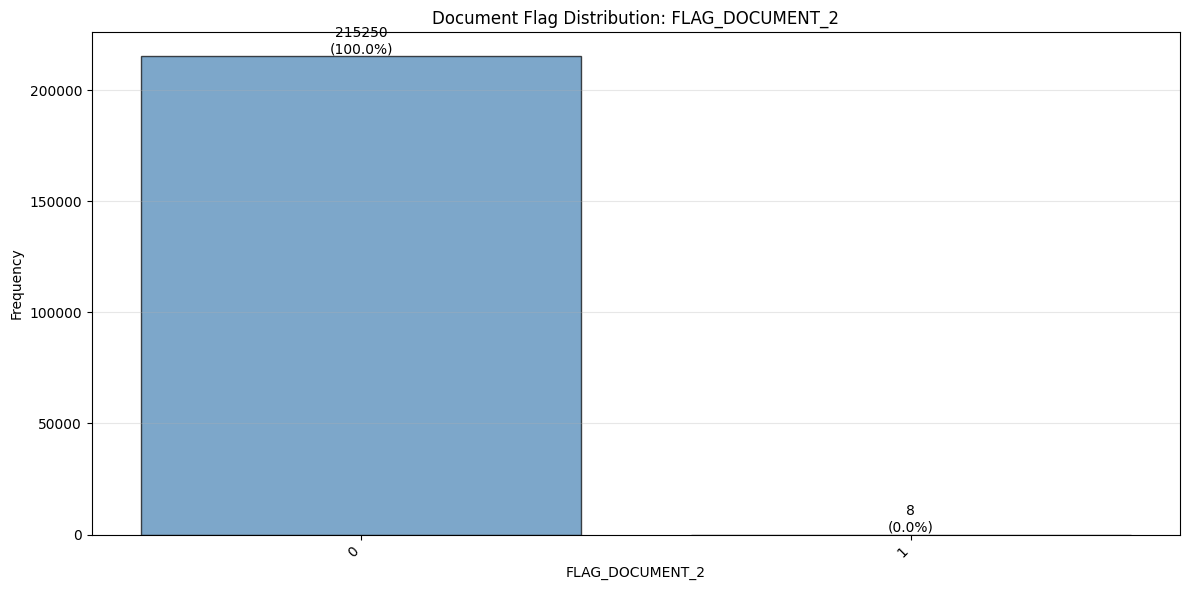

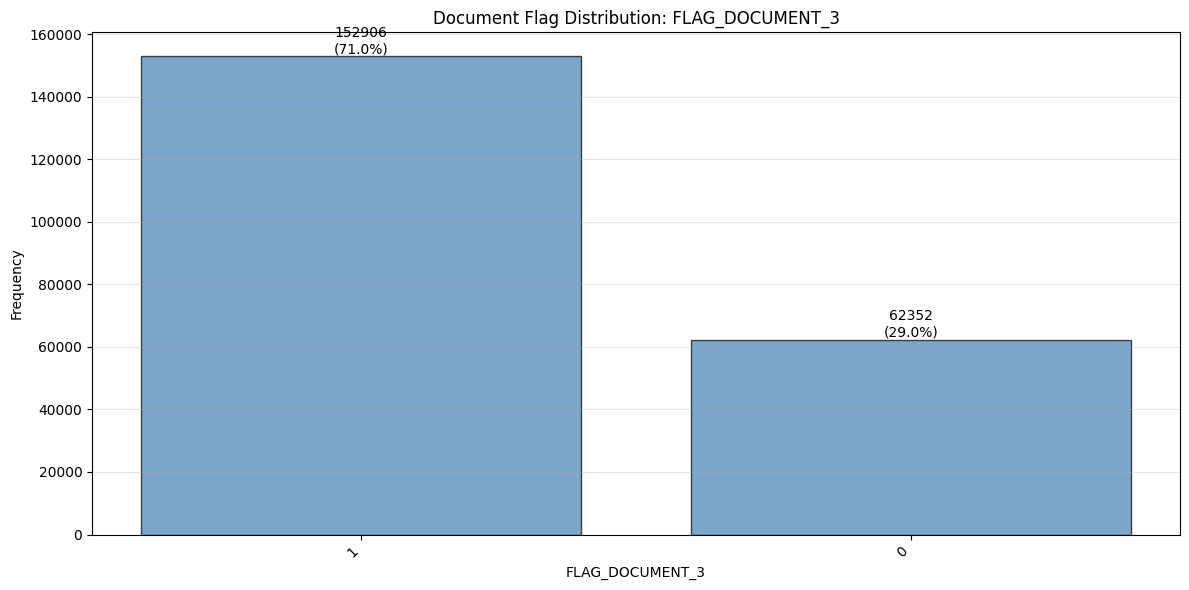

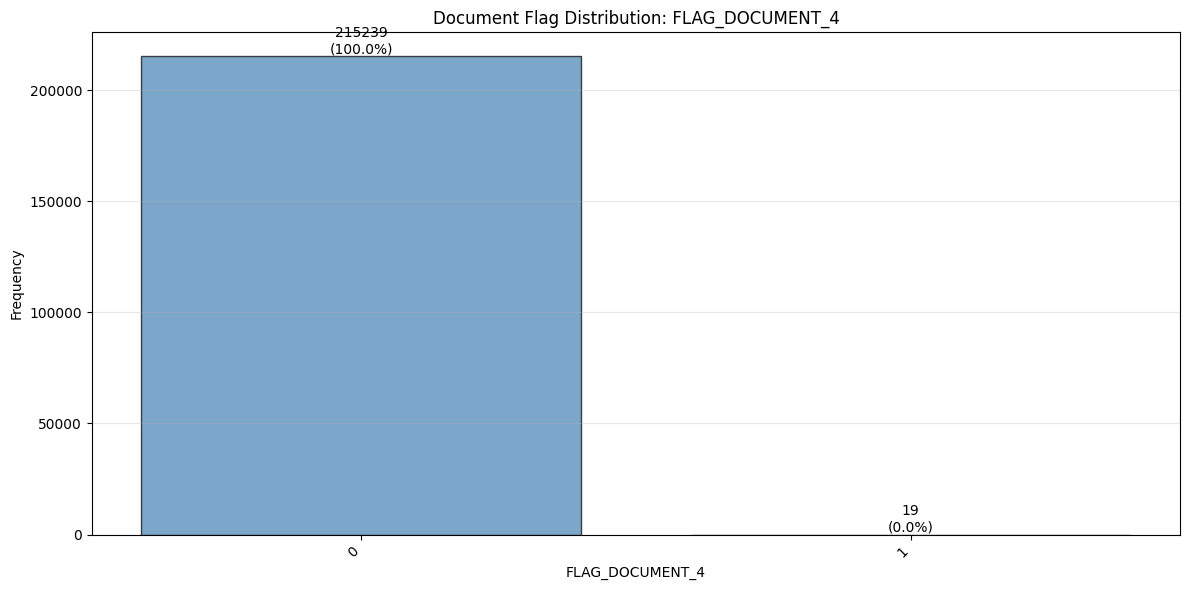

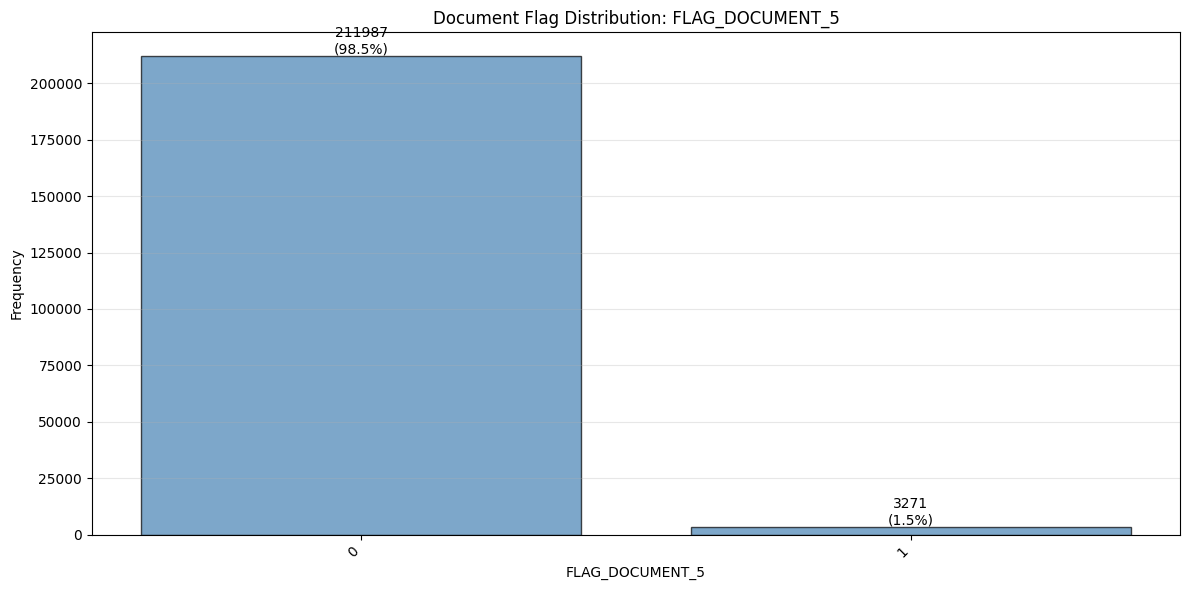

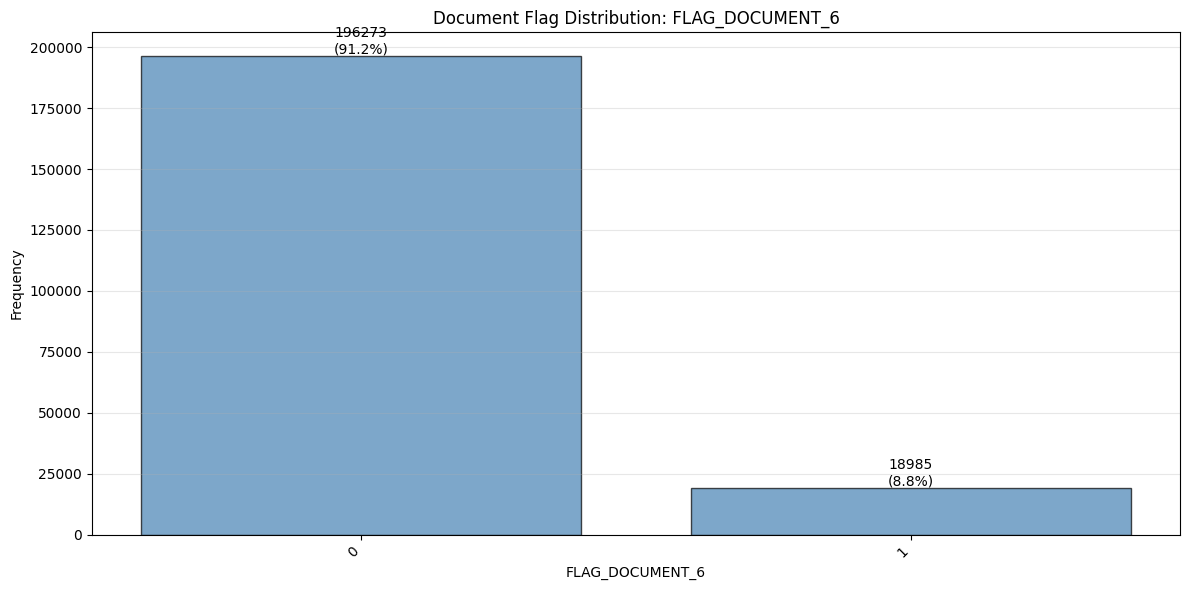

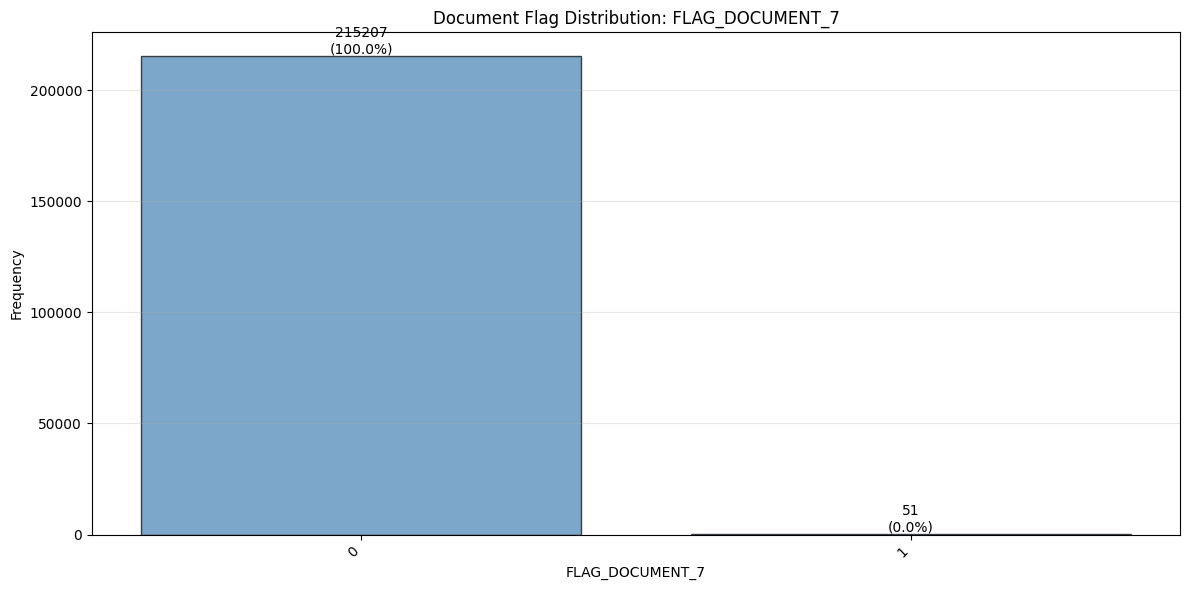

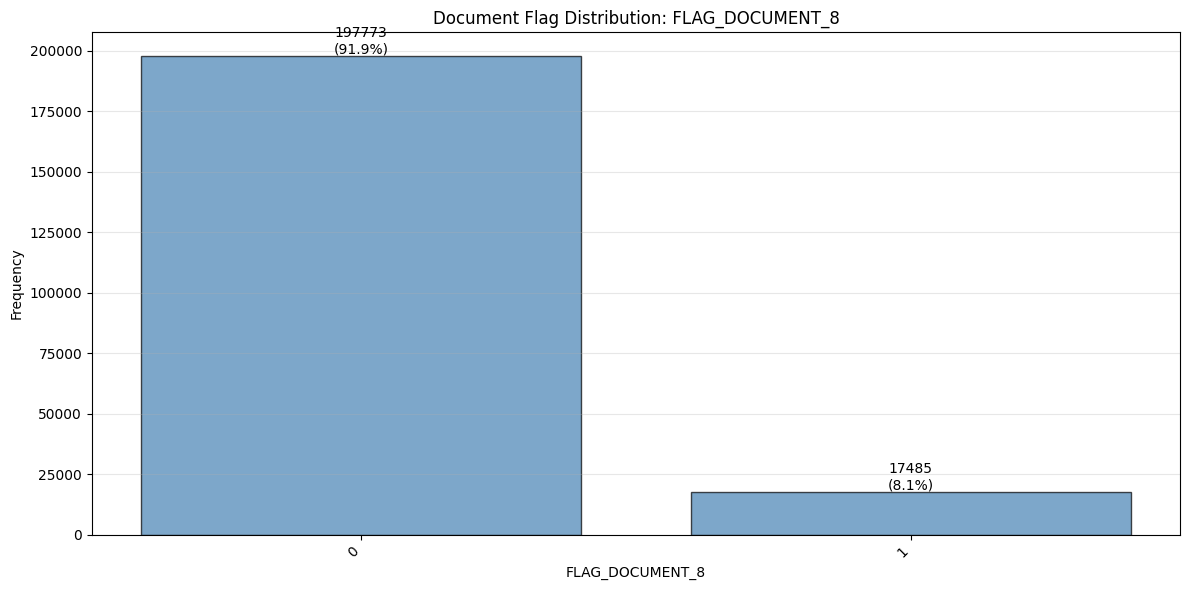

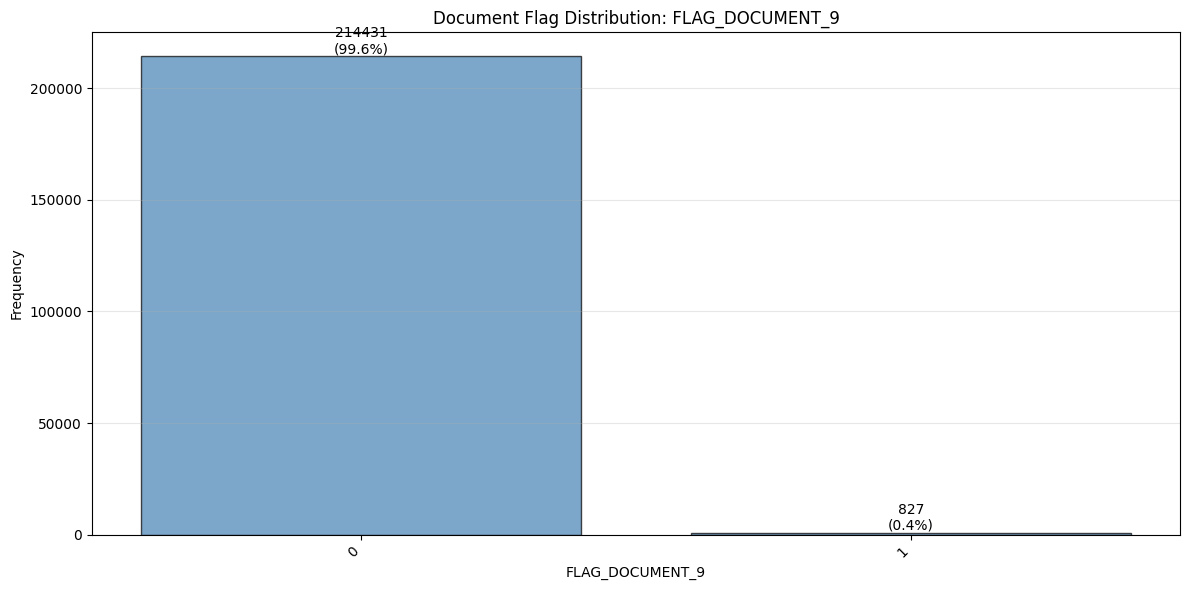

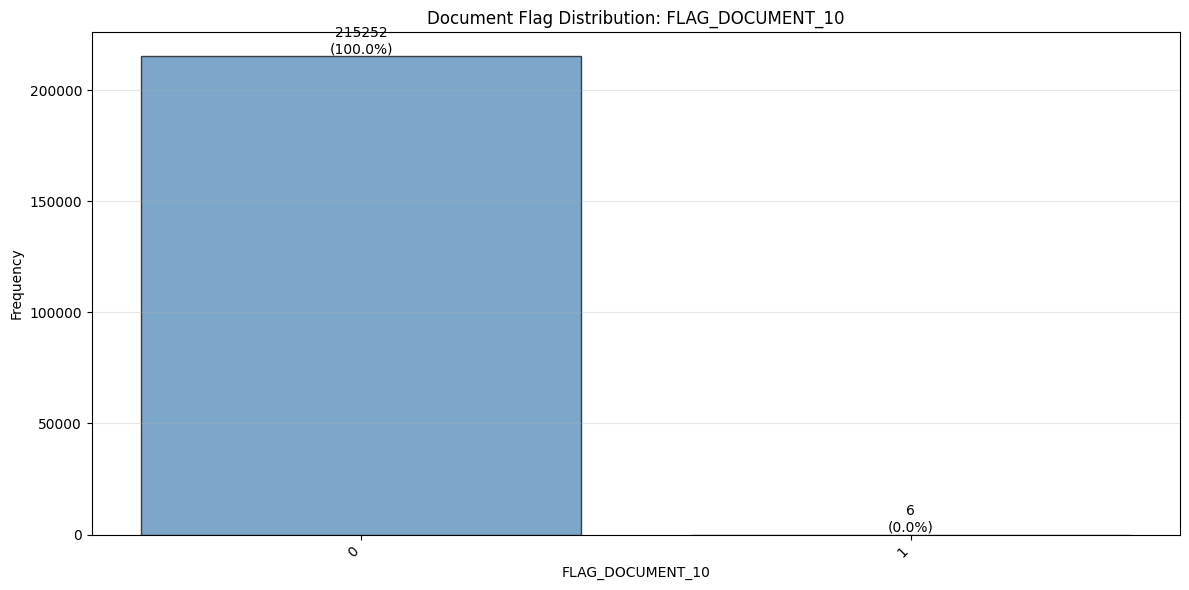

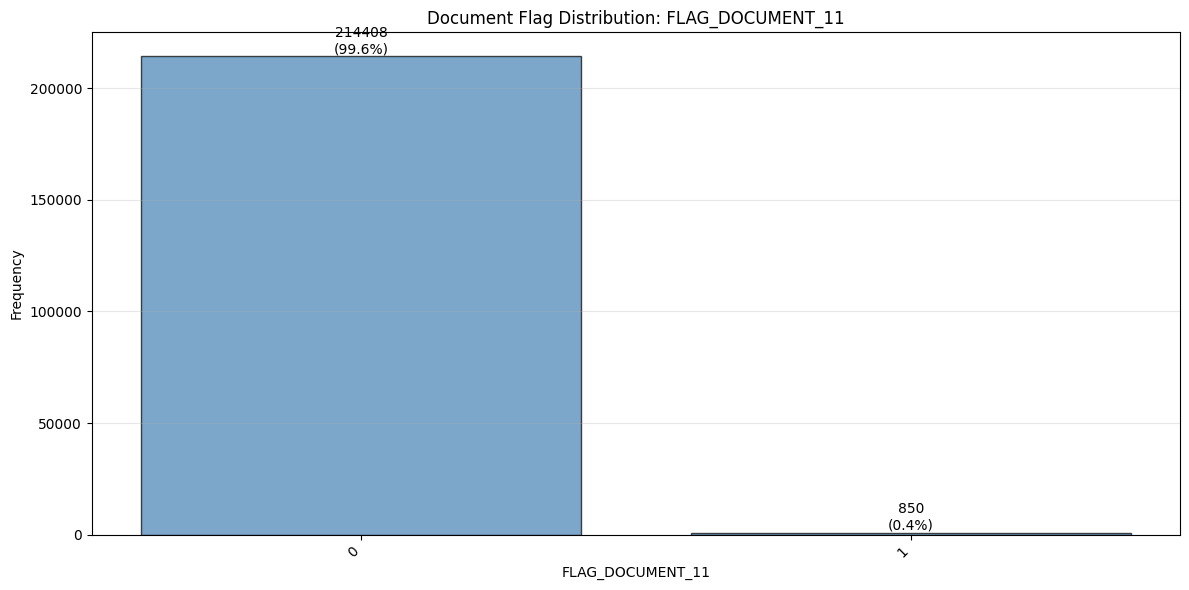

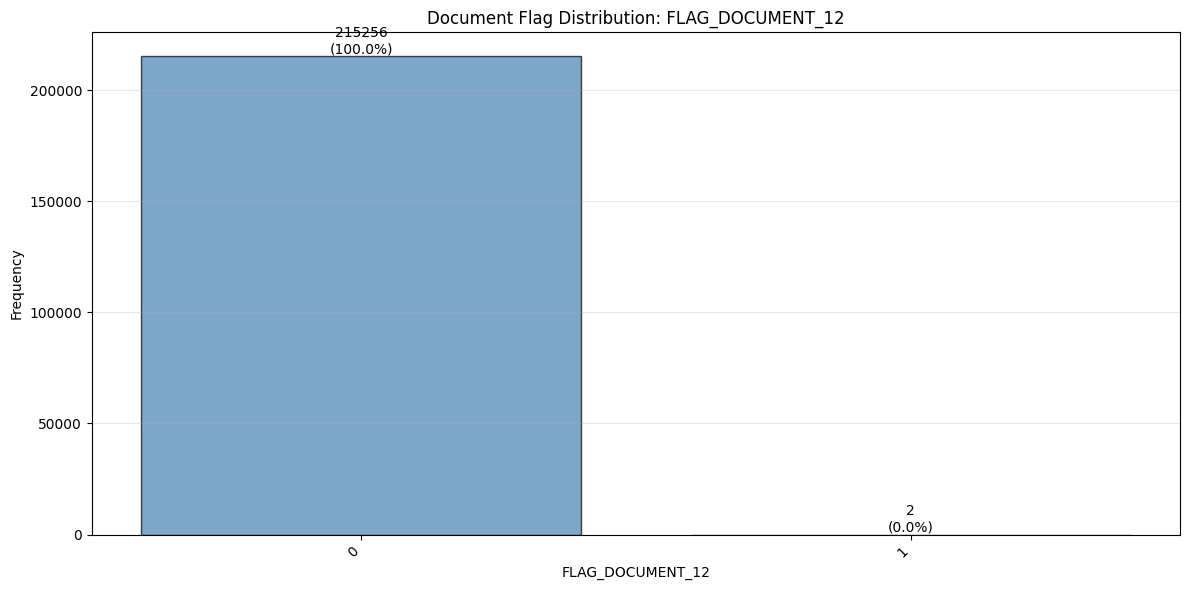

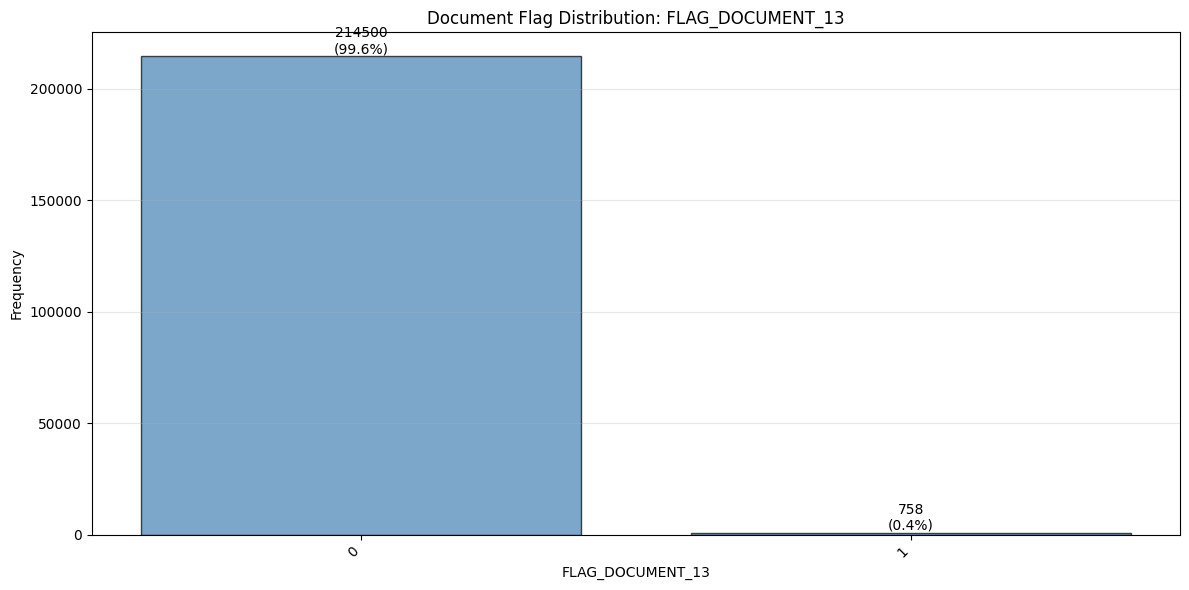

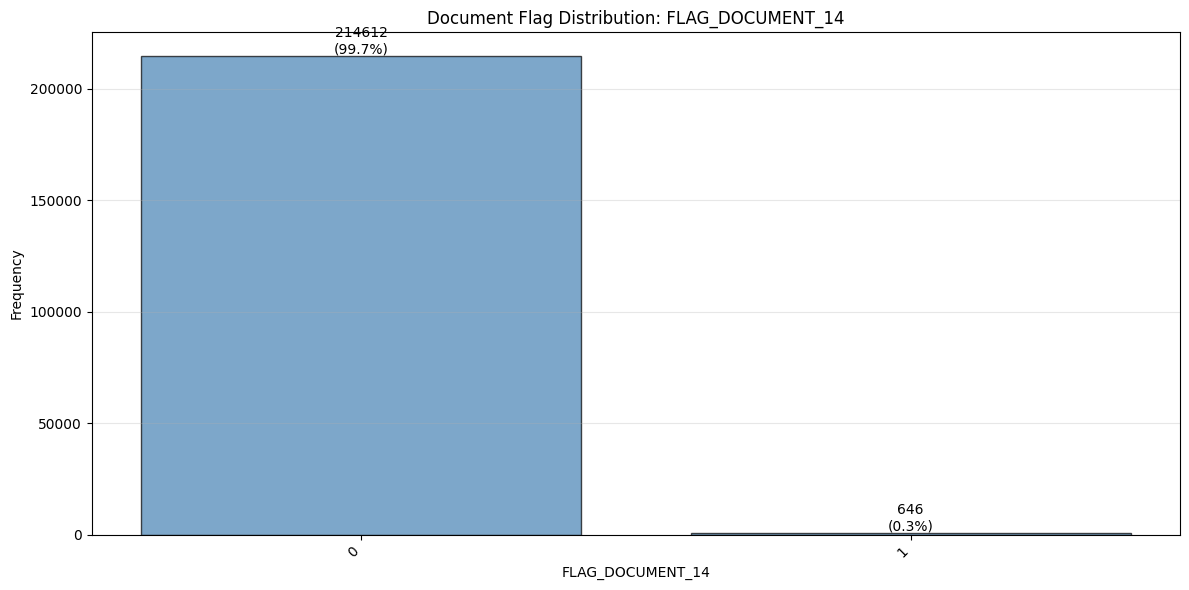

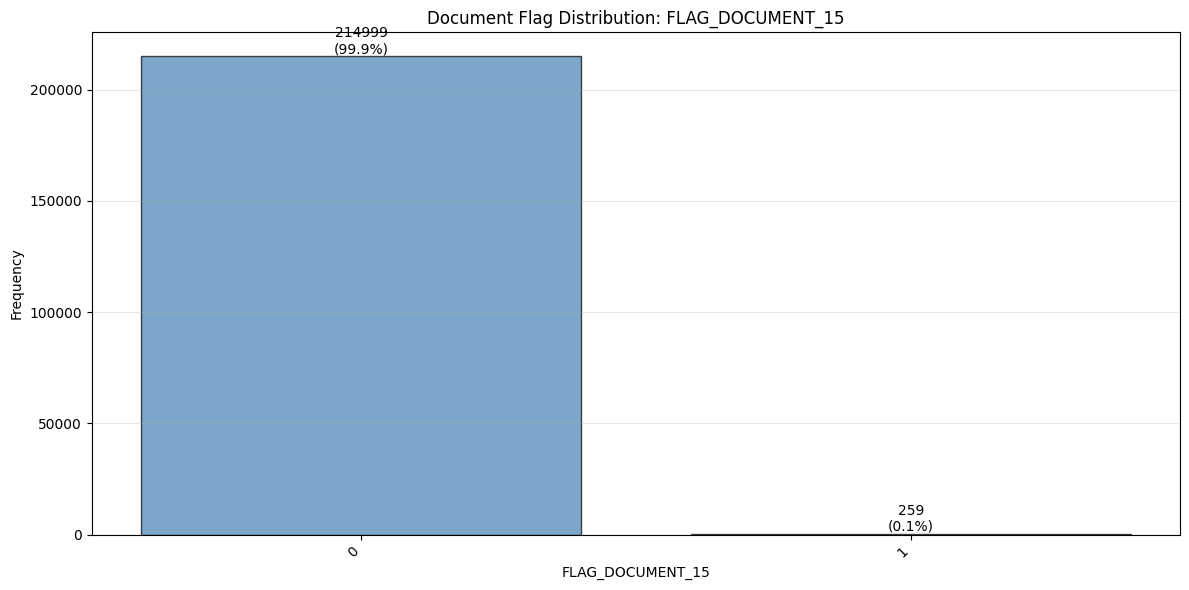

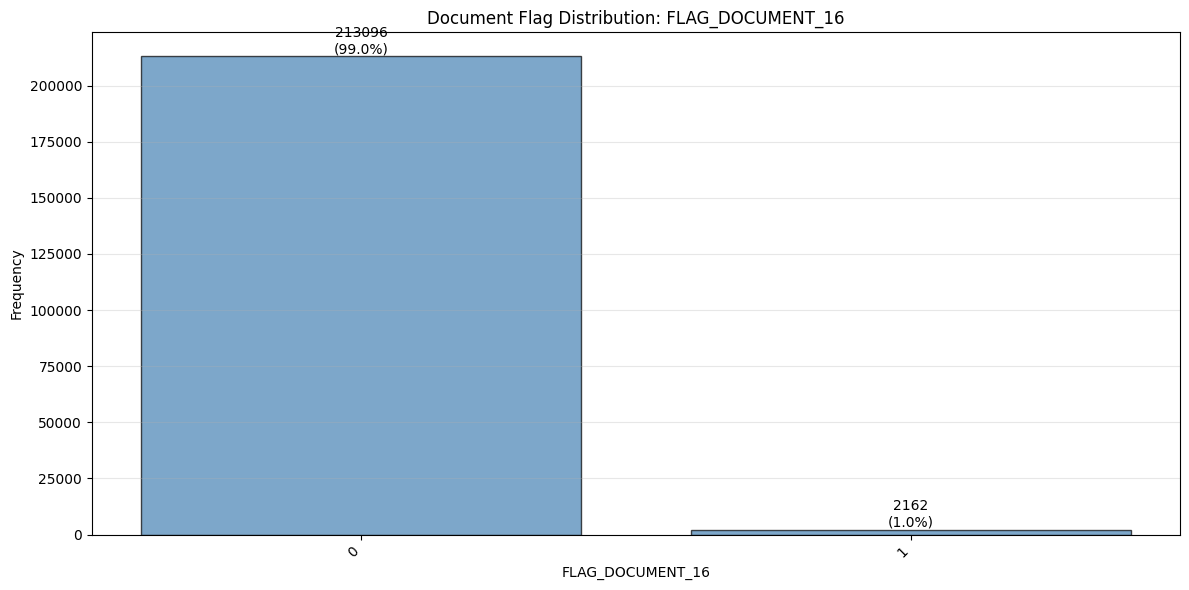

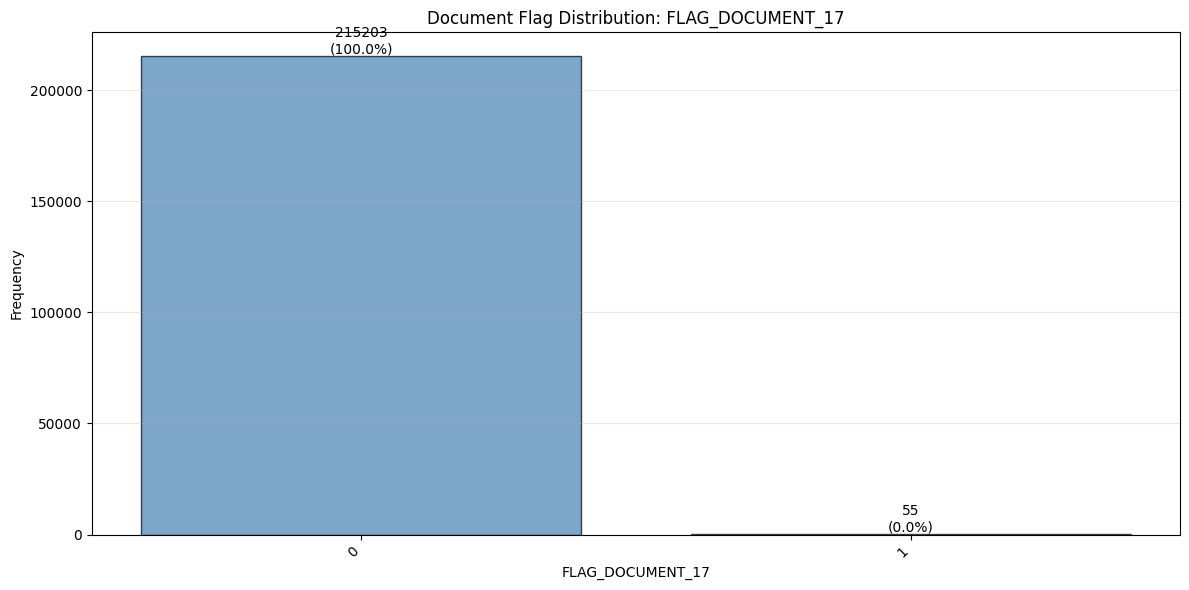

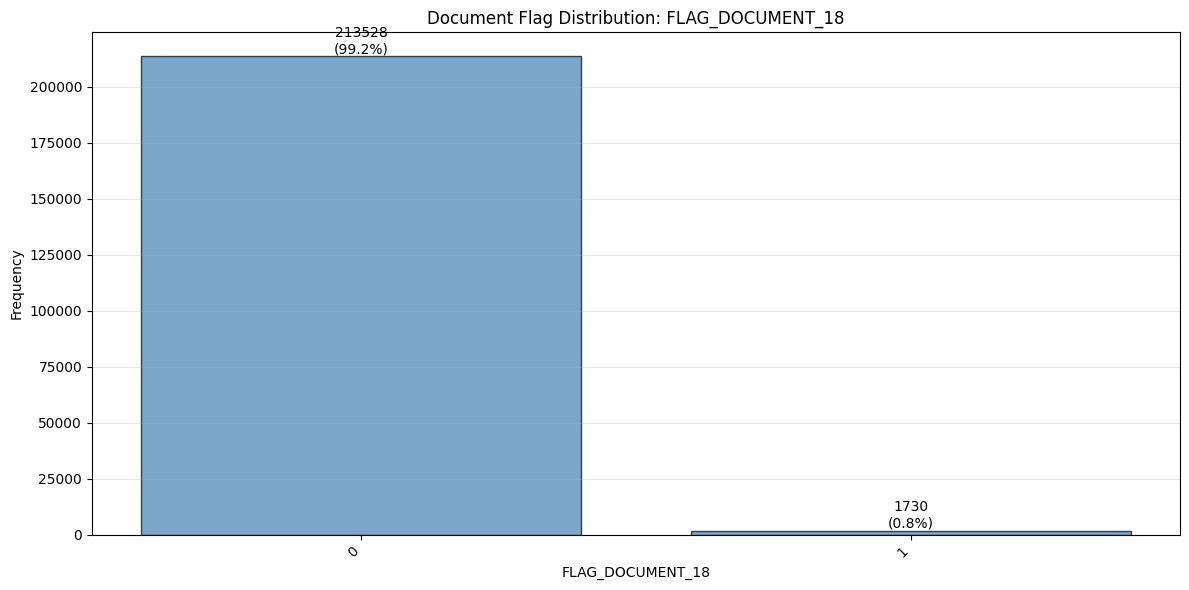

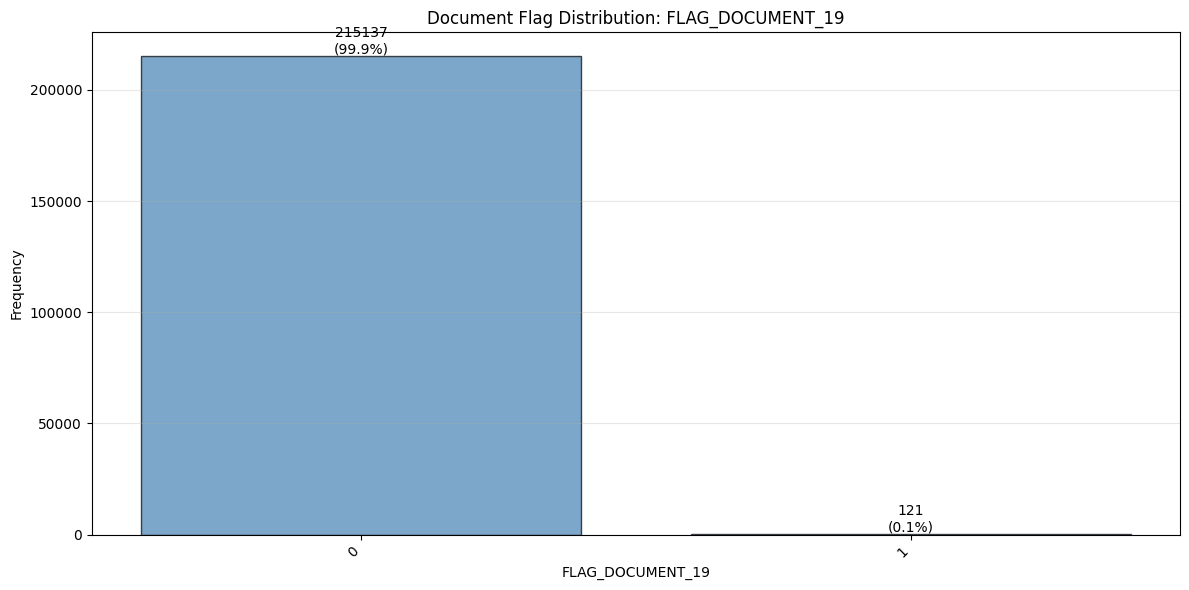

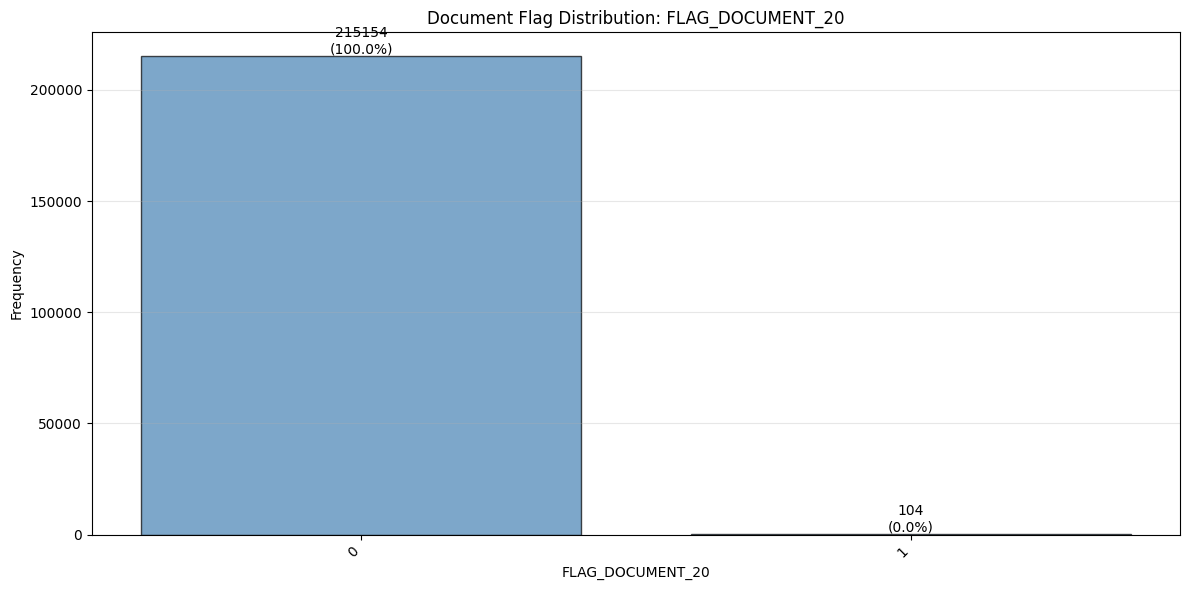

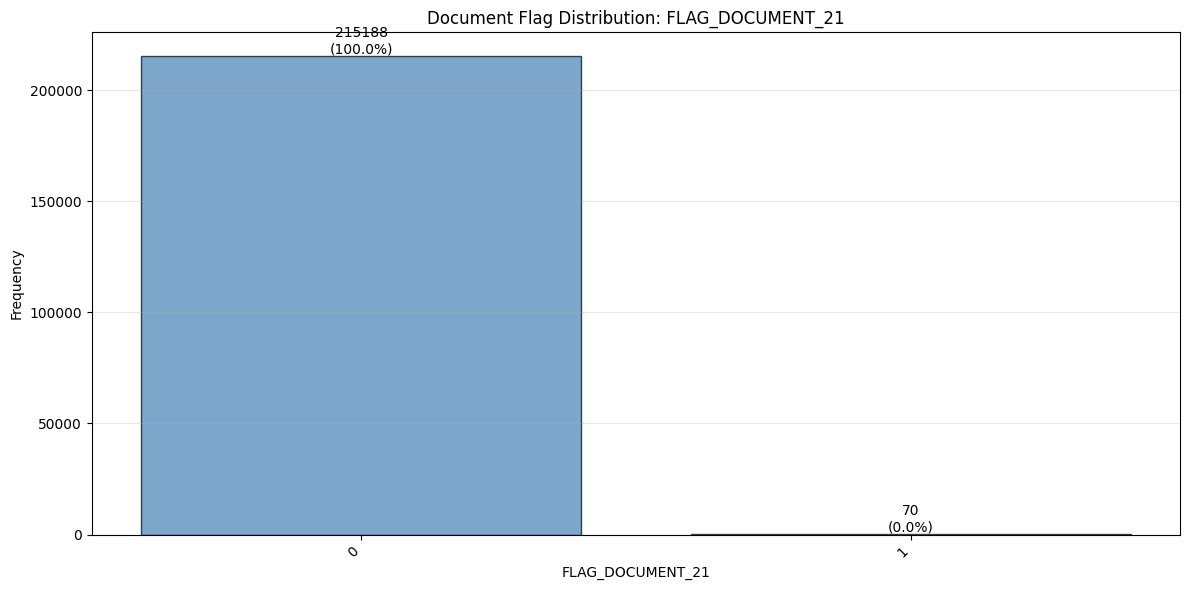

In [63]:
for col in document_cols:
    column_data = df[col]
    
    plot_nominal_topk_barchart(
        data=column_data,
        top_k=2, 
        title=f'Document Flag Distribution: {col}',
    )

In [64]:
results_list = []

for col in document_cols:
    column_data = df[col]
    
    metrics_df = calculate_nominal_metrics(data=column_data)
    results_list.append(metrics_df)

document_metrics_summary = pd.concat(results_list, ignore_index=True)

document_metrics_summary

,Feature,Count,Missing,Unique_Values,Mode,Mode_Frequency,Mode_Percentage
0,FLAG_DOCUMENT_2,215258,0,2,0,215250,99.996284
1,FLAG_DOCUMENT_3,215258,0,2,1,152906,71.033829
2,FLAG_DOCUMENT_4,215258,0,2,0,215239,99.991173
3,FLAG_DOCUMENT_5,215258,0,2,0,211987,98.480428
4,FLAG_DOCUMENT_6,215258,0,2,0,196273,91.180351
5,FLAG_DOCUMENT_7,215258,0,2,0,215207,99.976308
6,FLAG_DOCUMENT_8,215258,0,2,0,197773,91.877189
7,FLAG_DOCUMENT_9,215258,0,2,0,214431,99.615810
8,FLAG_DOCUMENT_10,215258,0,2,0,215252,99.997213
9,FLAG_DOCUMENT_11,215258,0,2,0,214408,99.605125


**Analysis of Imbalance in FLAG_DOCUMENT Variables**  

***Severe Imbalance in Most Variables***
- **16 out of 20 variables** are *highly imbalanced*, with the positive class (`1`) appearing fewer than **0.1%** of the time.
- **18 out of 20 variables** have a mode of `0` with Mode Percentages above `98%`, and several exceed `99.99%`.
- Some extreme cases:
  - `FLAG_DOCUMENT_12`: only **2** occurrences of `1` (`99.999%` zeros)
  - `FLAG_DOCUMENT_10`: **6** occurrences (`99.997%` zeros)
  - `FLAG_DOCUMENT_2`: **8** occurrences (`99.996%` zeros)

These variables behave almost like constants and are unlikely to carry meaningful predictive information.

***Why the Imbalance Occurs***
- **Business reason:** Many document types are required only in rare or special loan applications such as collateral documents or legal certificates.
- **Not an error:** No evidence of data entry issues, invalid values, or structural missingness.

***Impact on Modeling***

Since they are strictly binary flags with one value overwhelmingly dominating the distribution, the variable shows:
  - Very low variance  
  - Low discriminative power  
  - High risk of overfitting on rare groups  
  - Tree-based models may ignore them; linear models may be biased.

Although all variables show 0 missing values, this does not improve their utility. A variable with no missing data but with near-zero variance still offers minimal predictive contribution.

Variables with extremely rare `1`s will likely be removed during feature selection.

### **FLAG_DOCUMENT_2 - FLAG_DOCUMENT_21 vs TARGET**

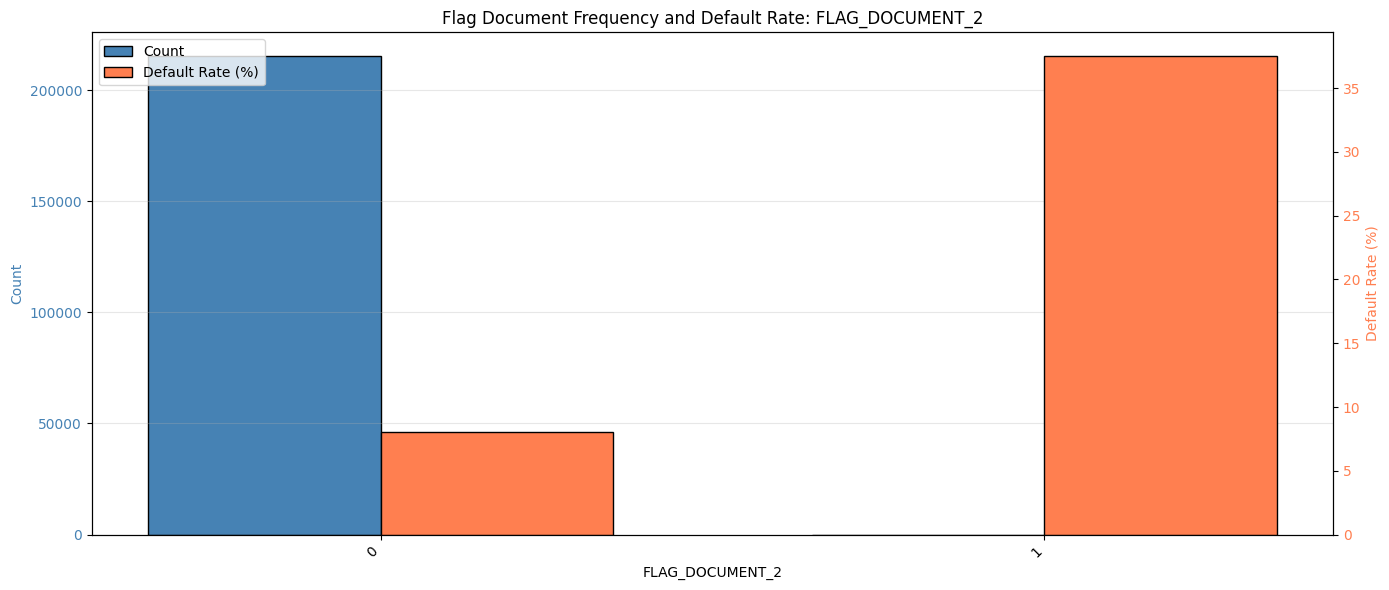

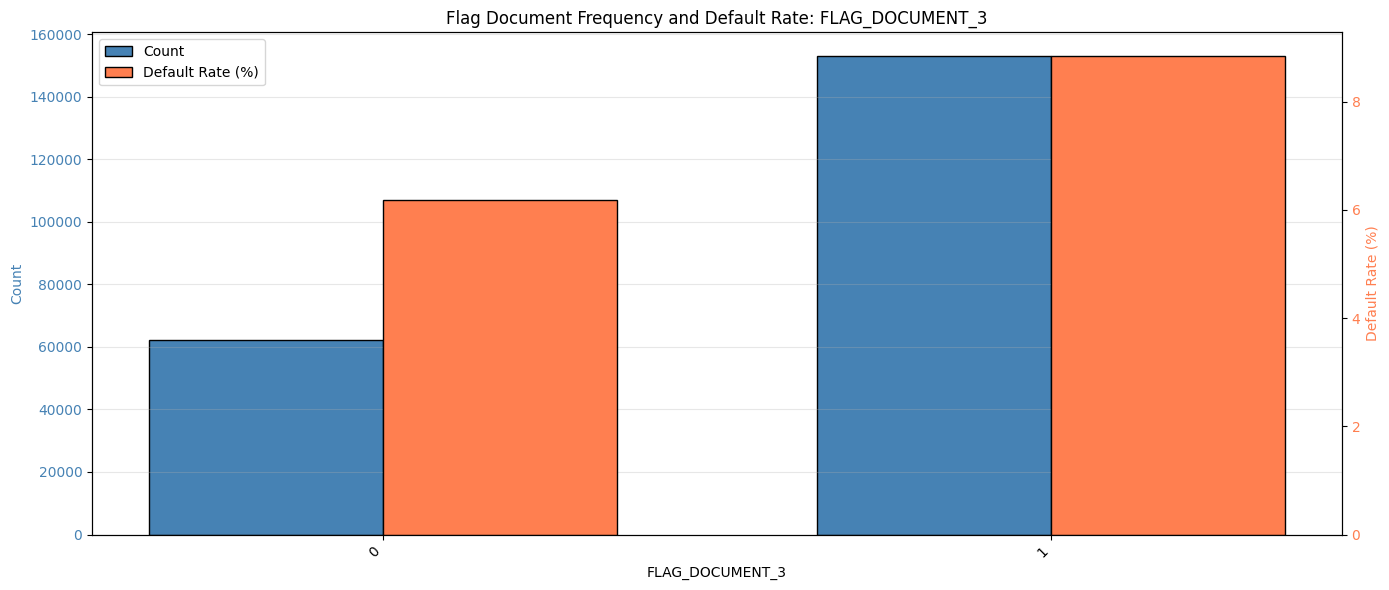

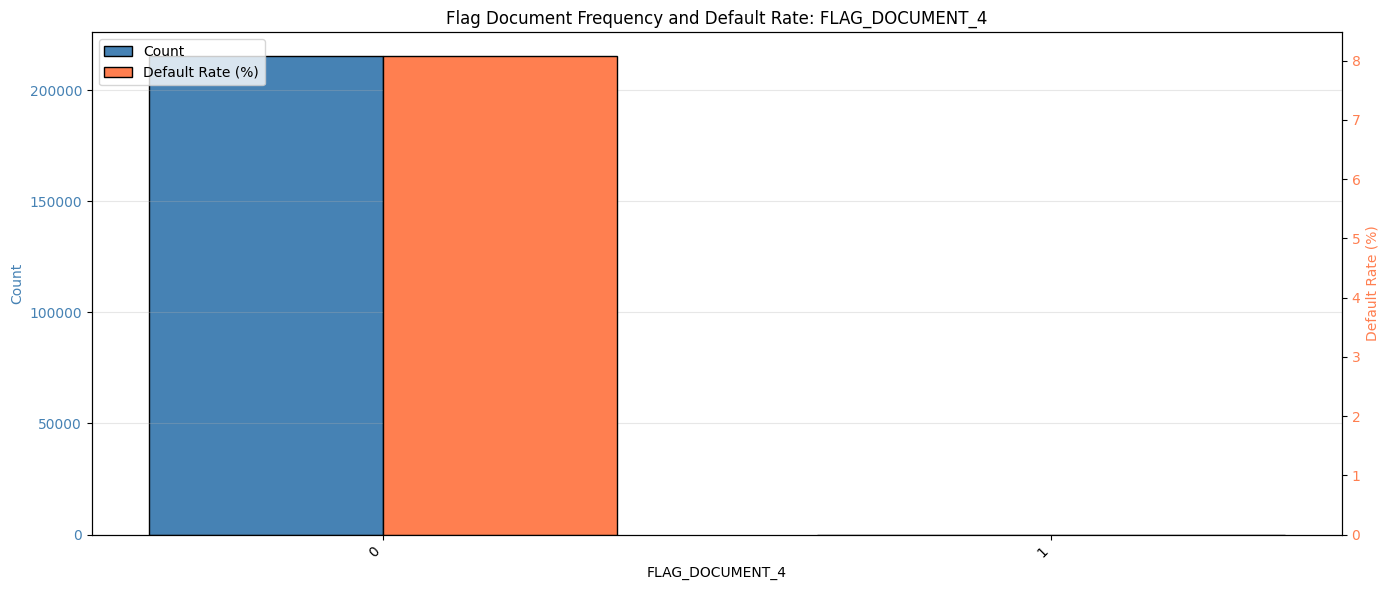

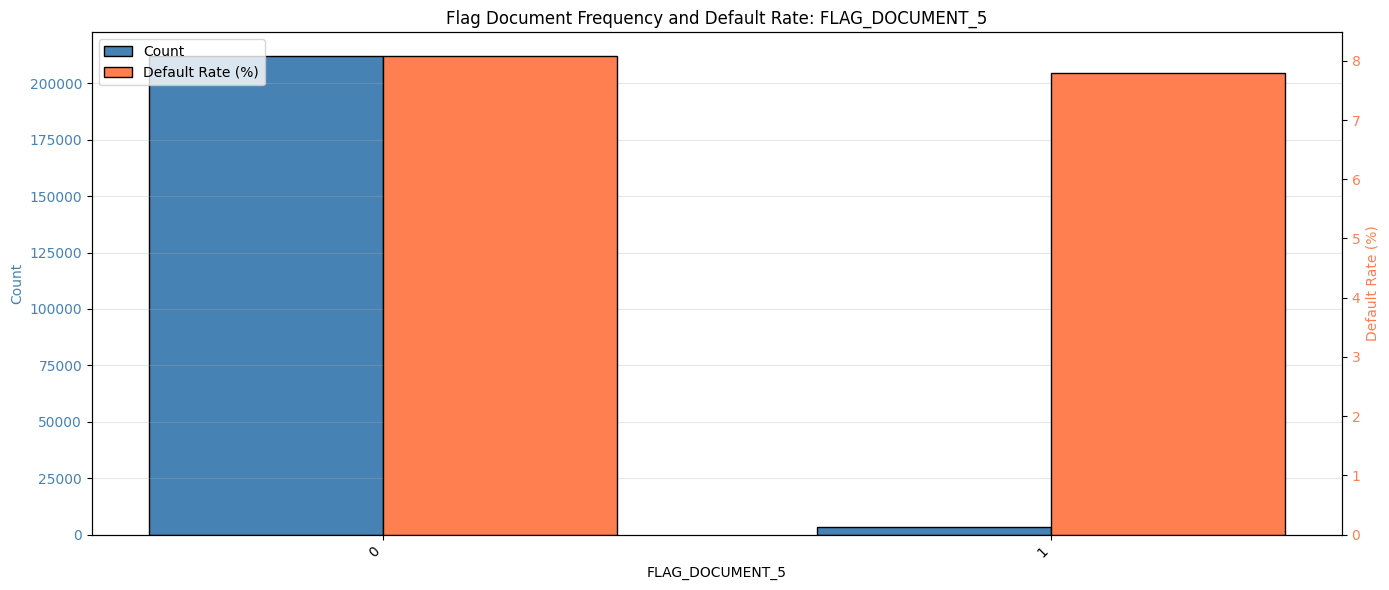

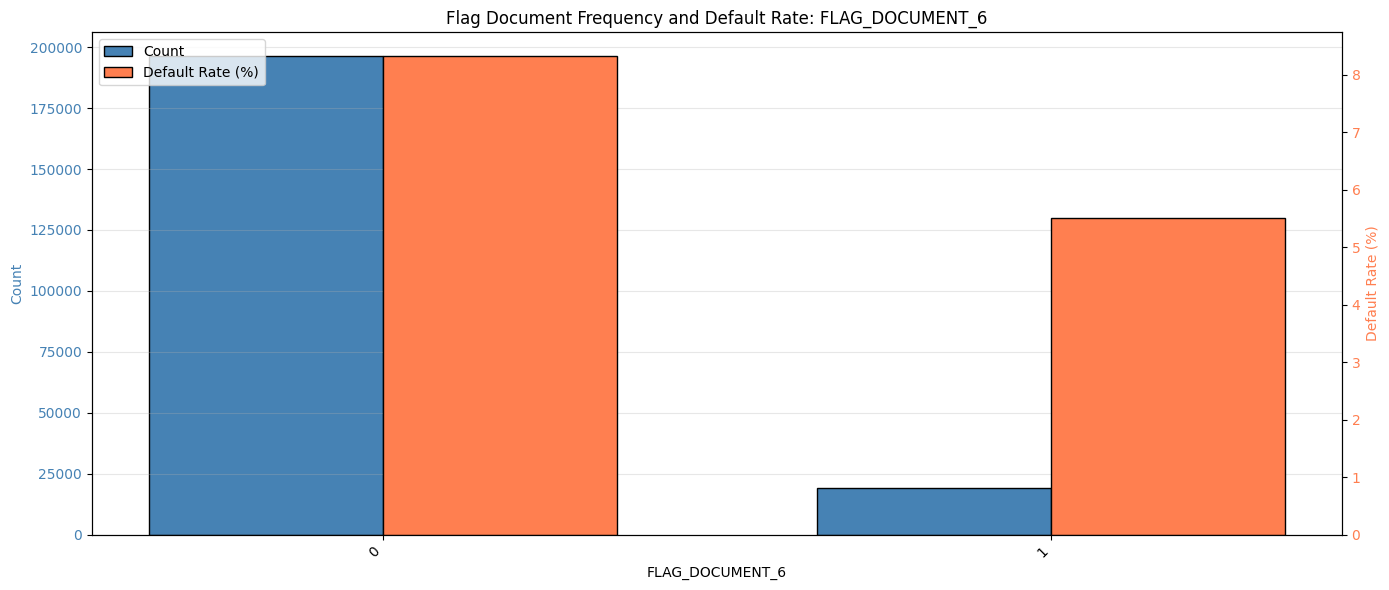

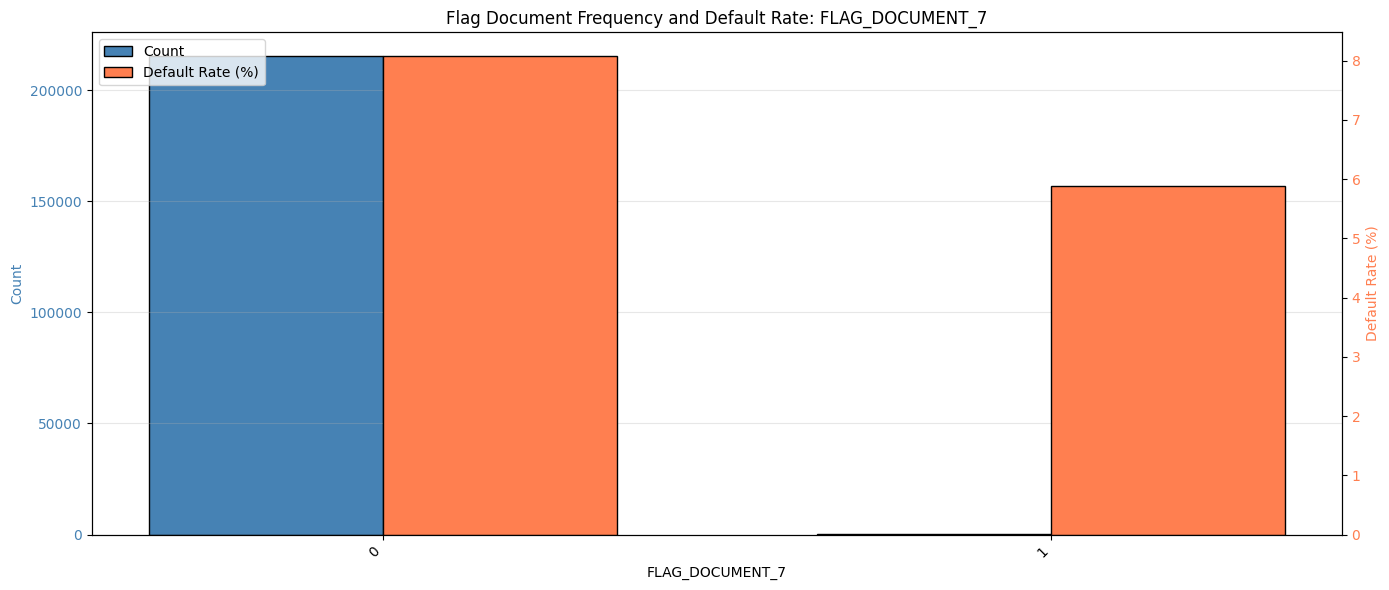

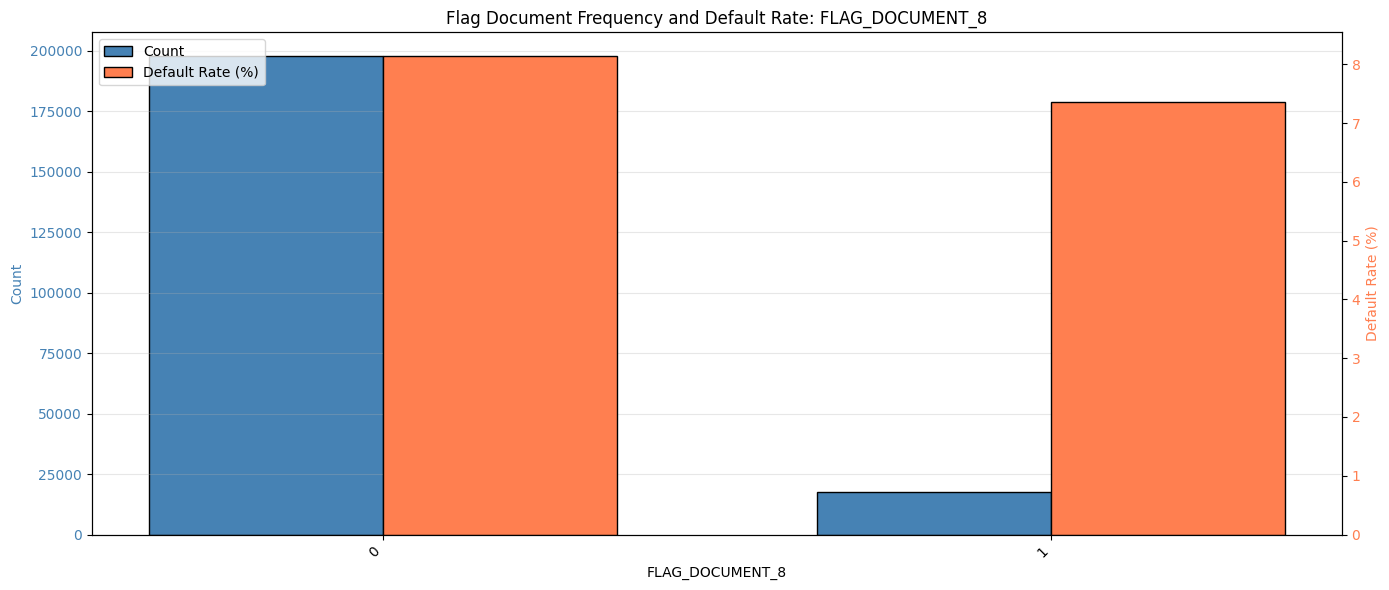

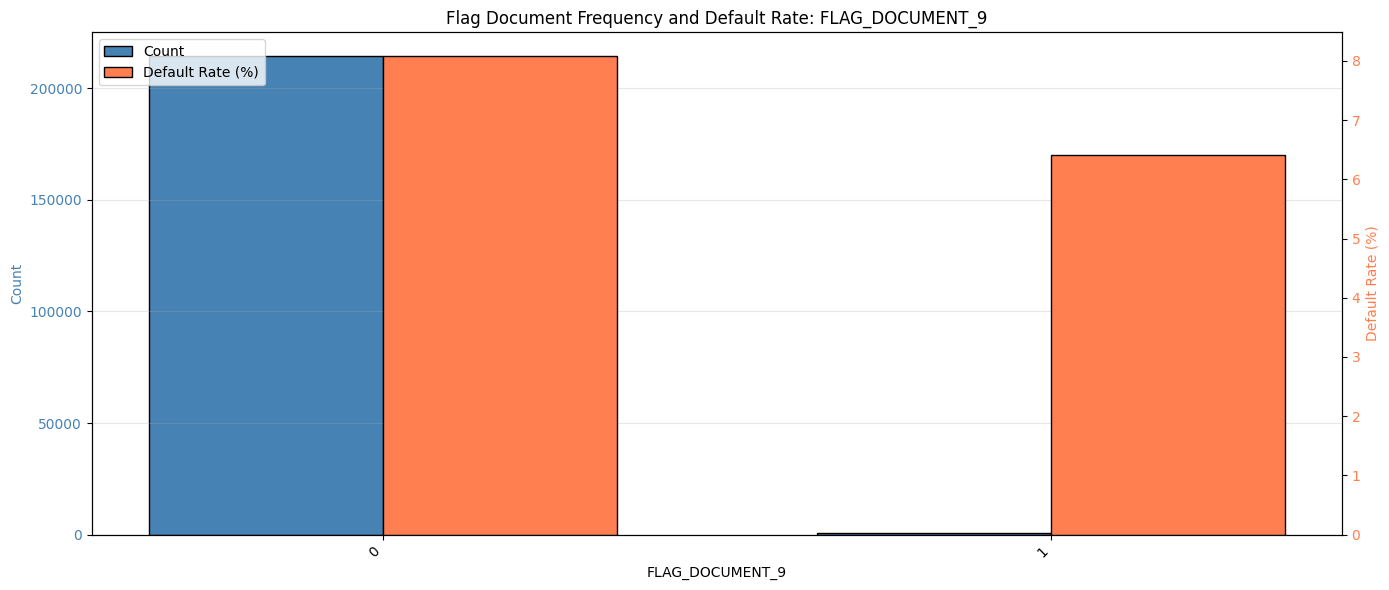

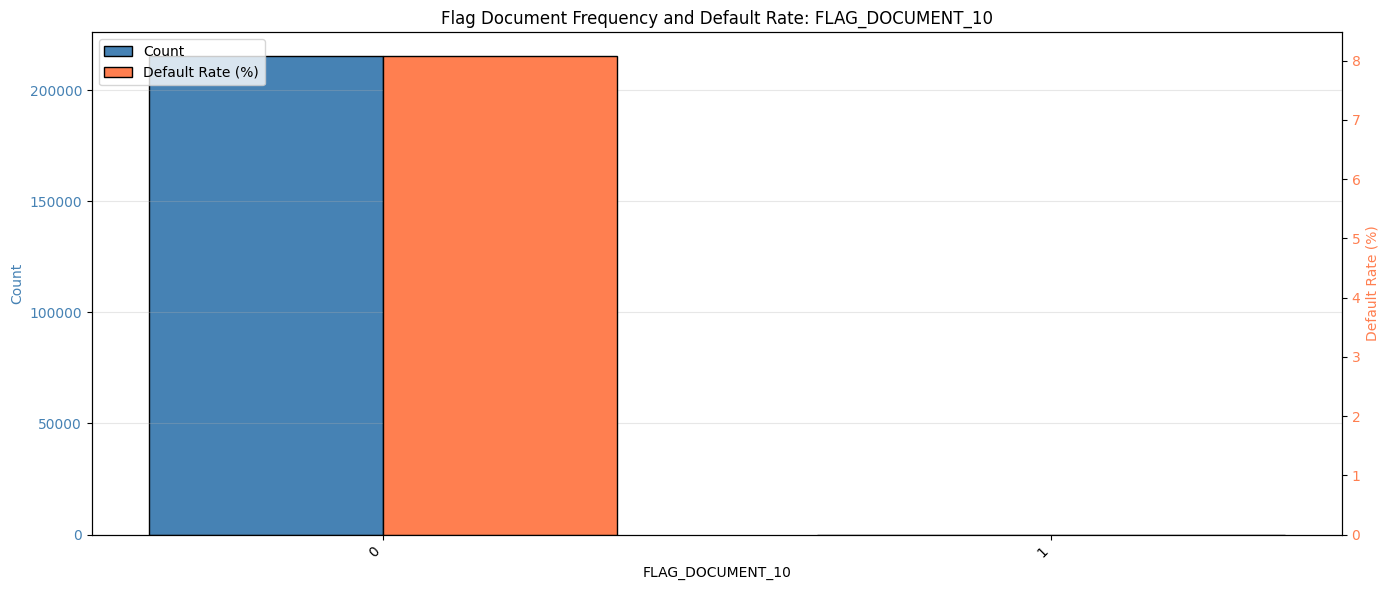

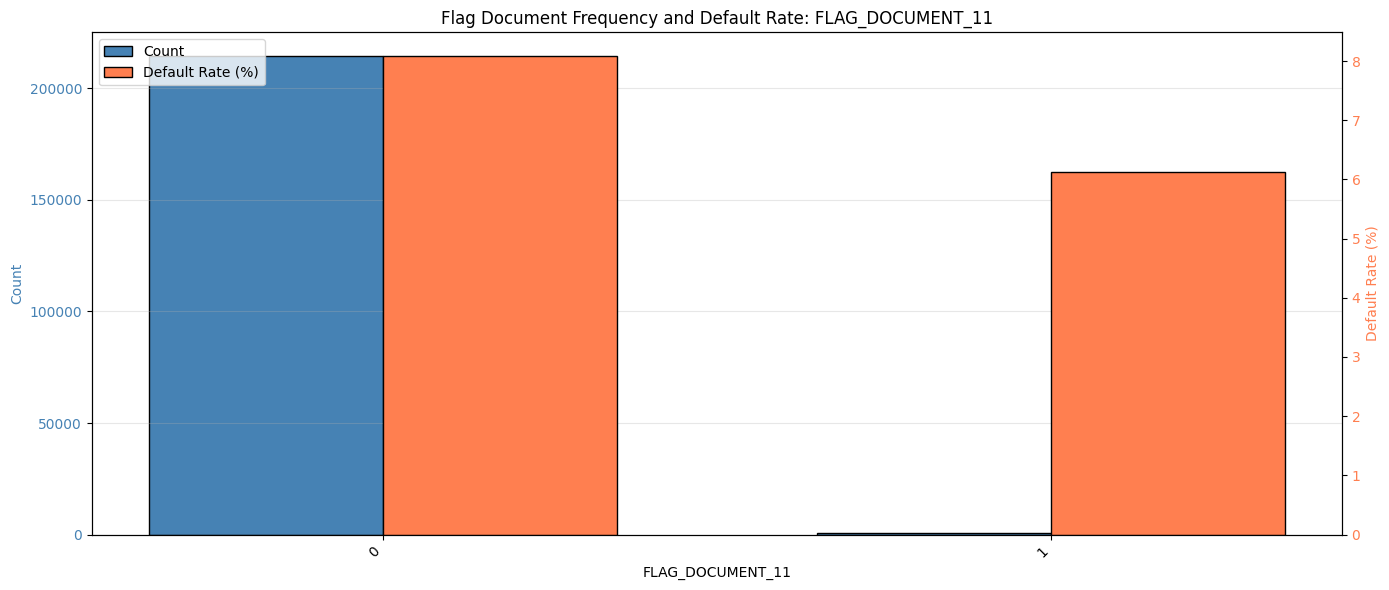

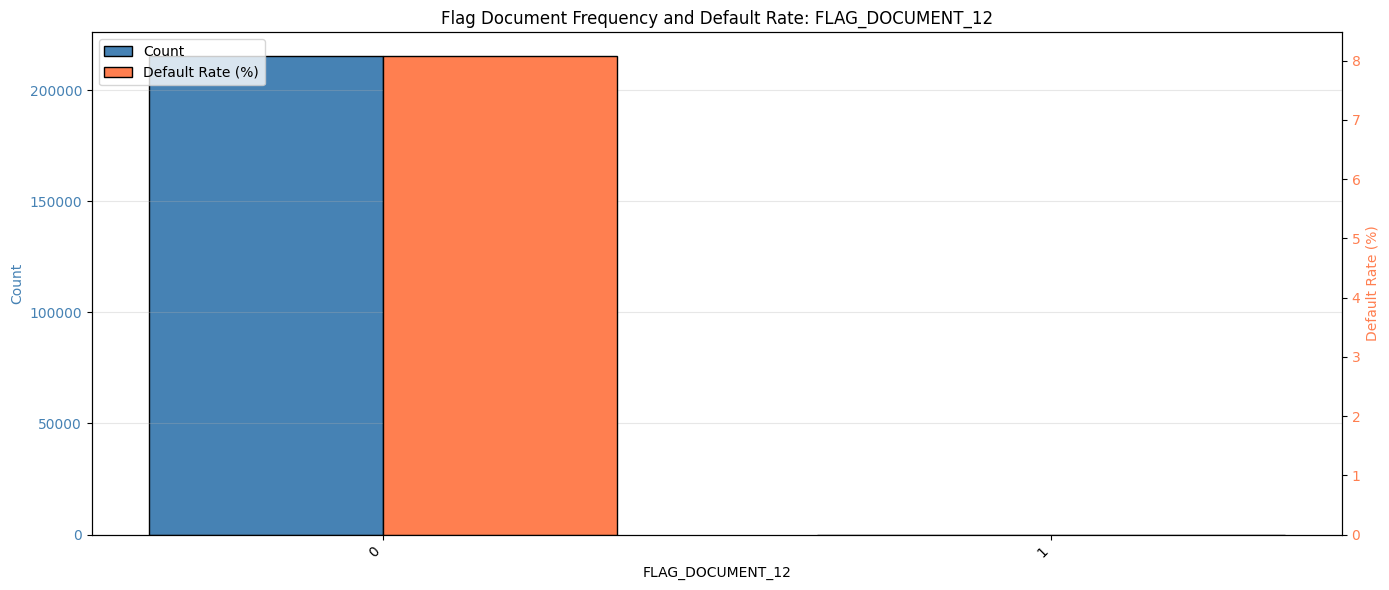

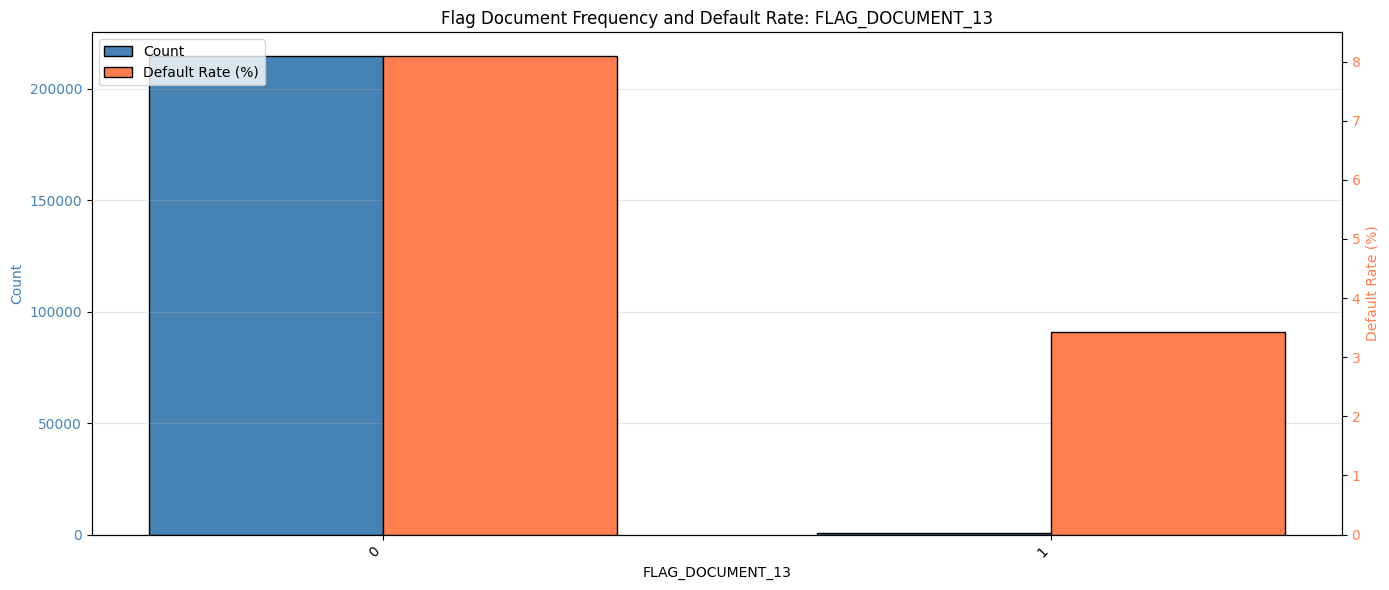

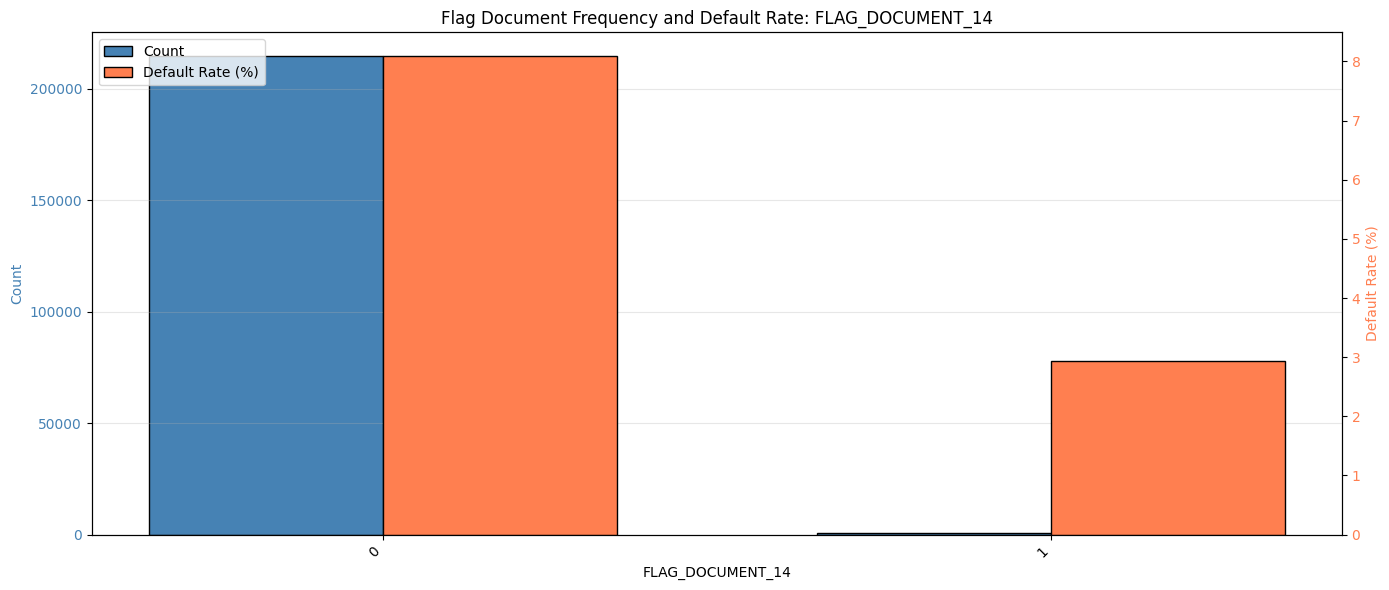

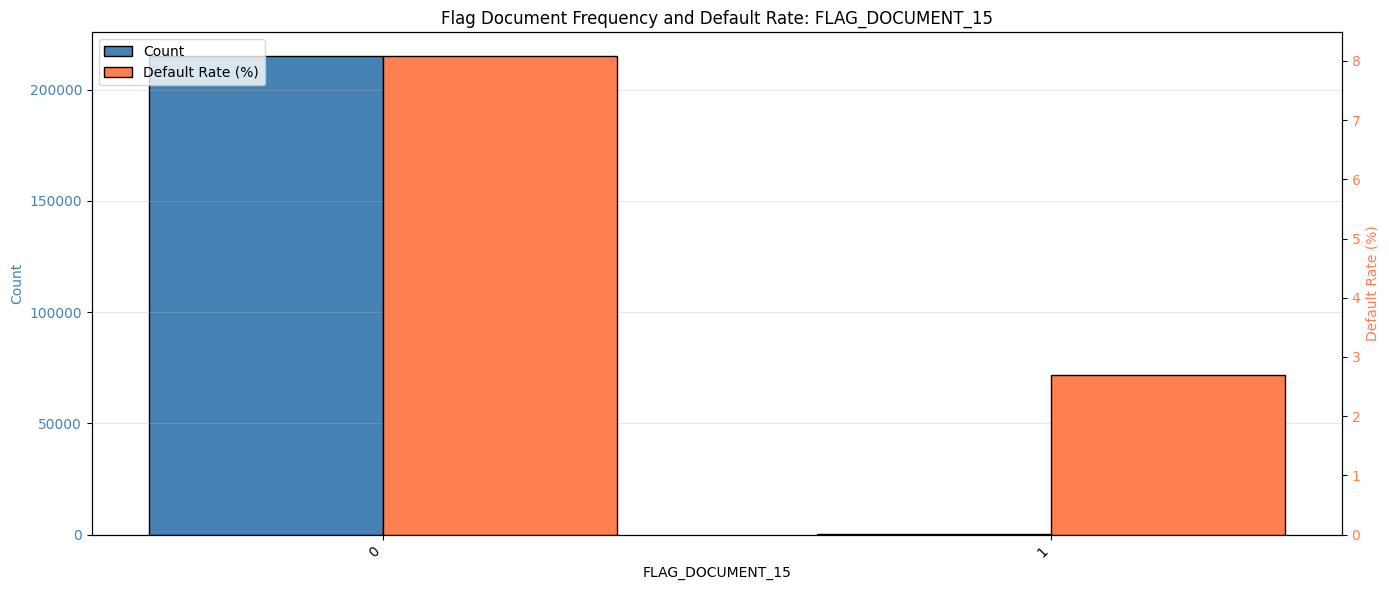

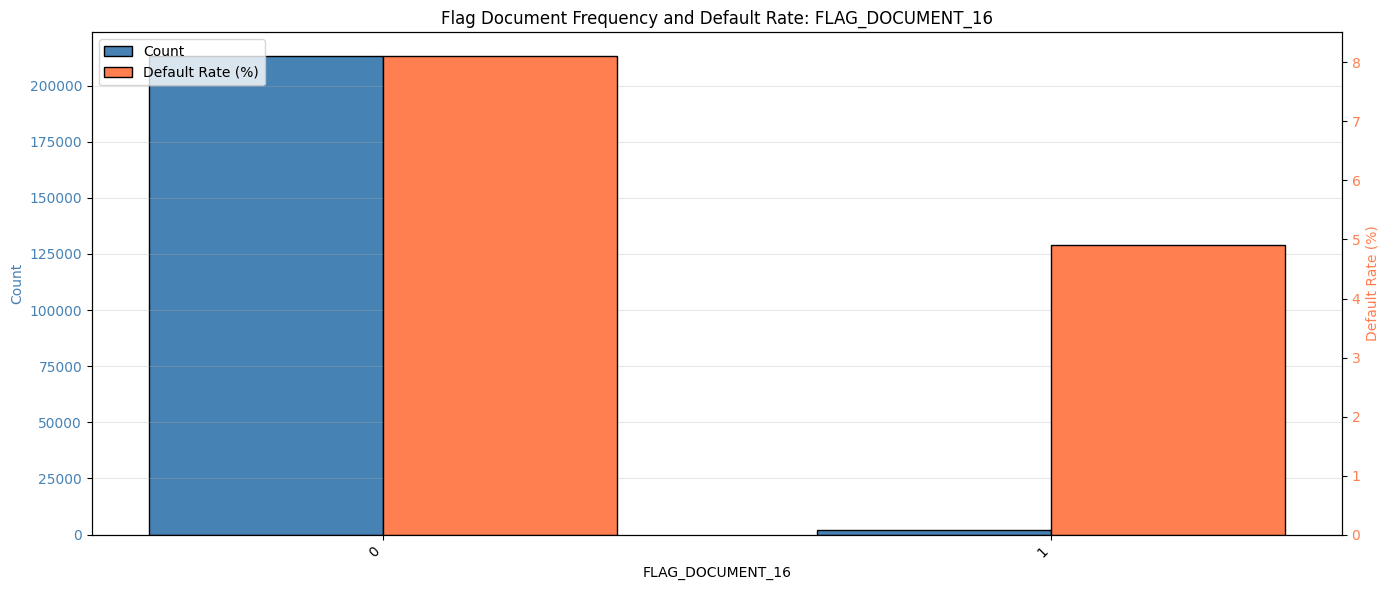

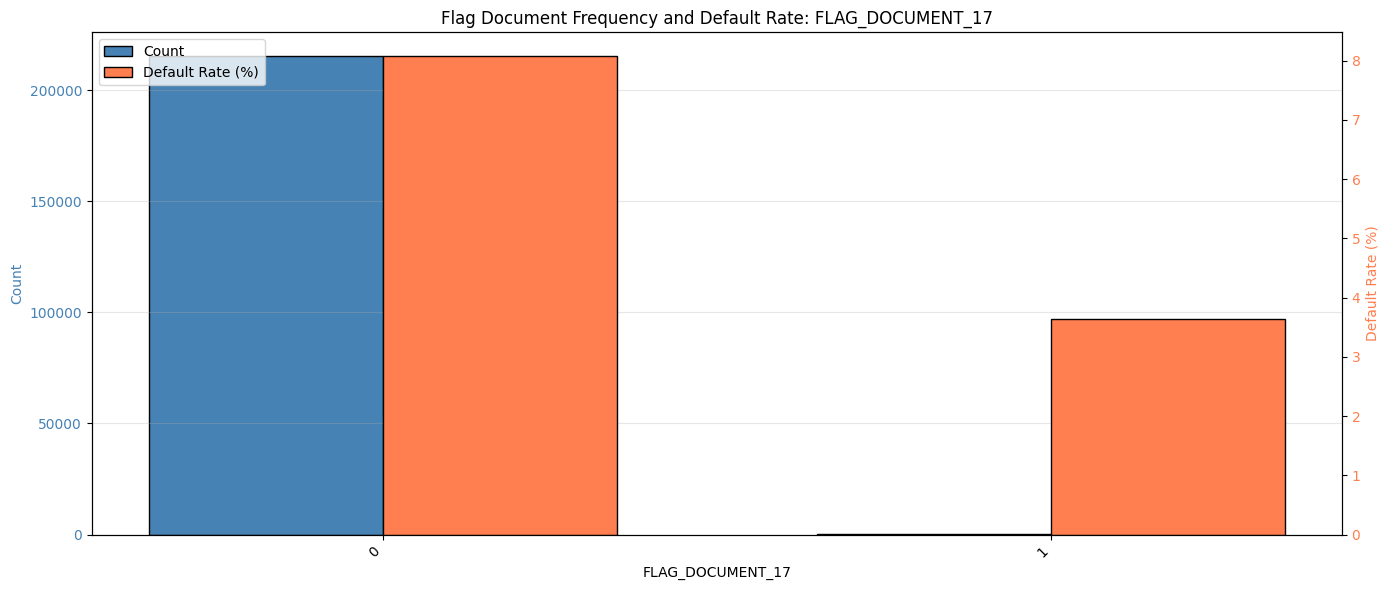

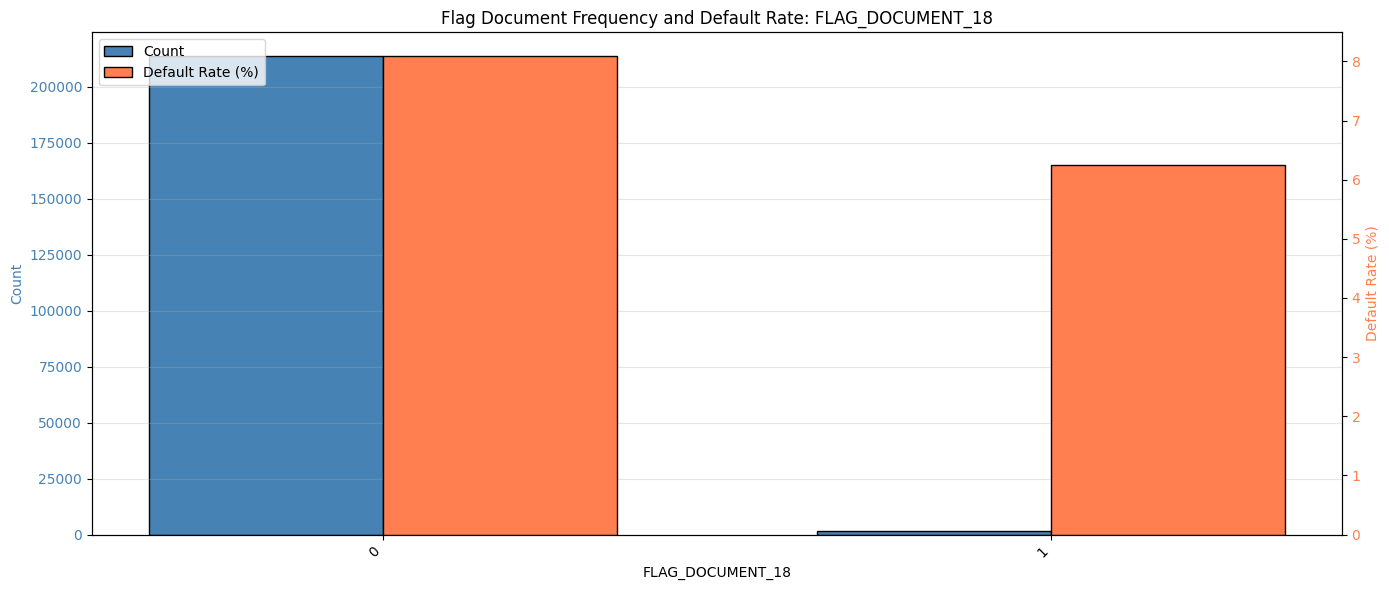

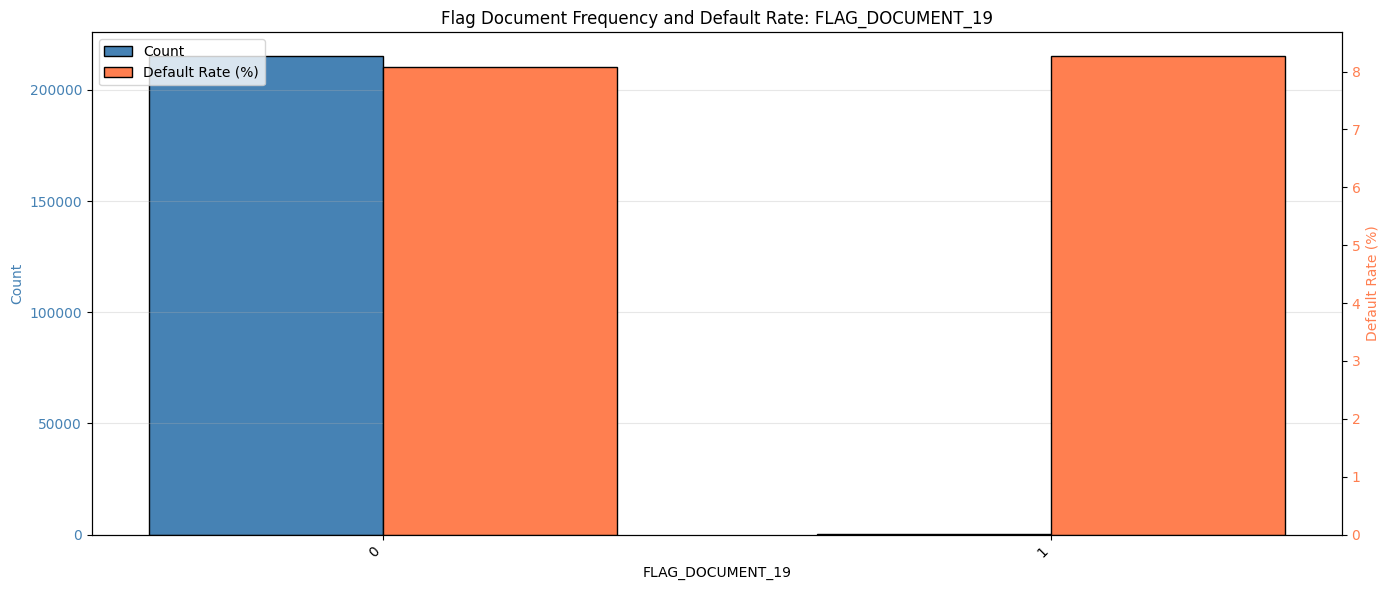

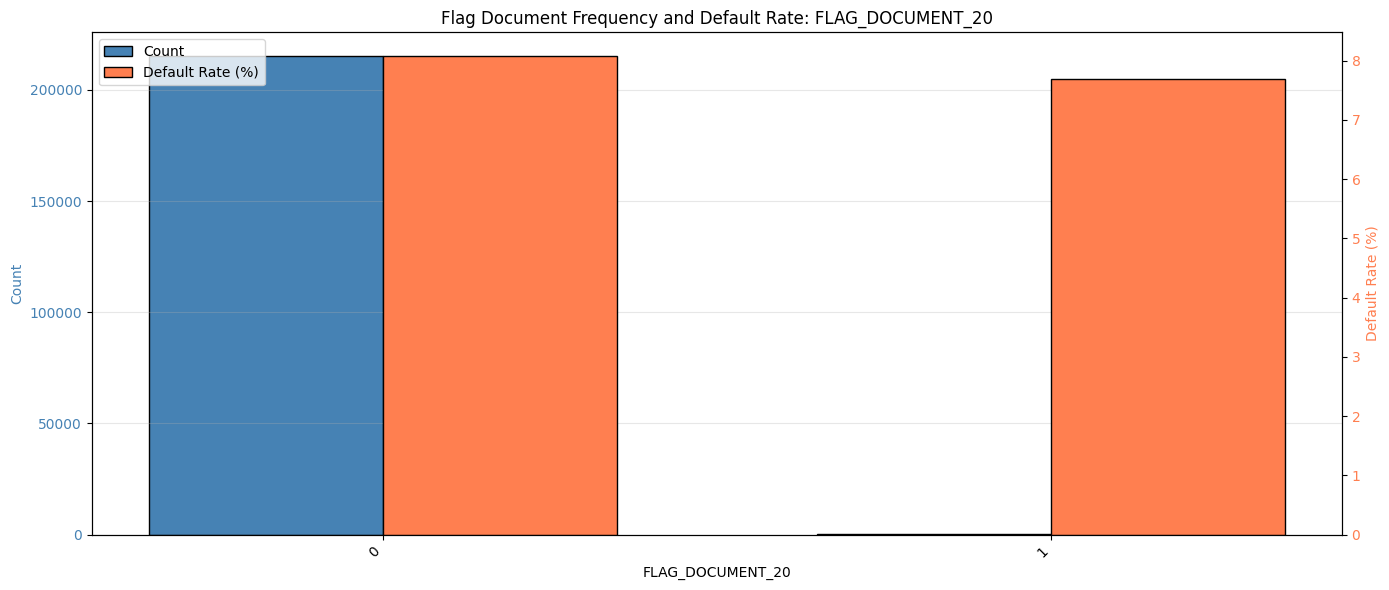

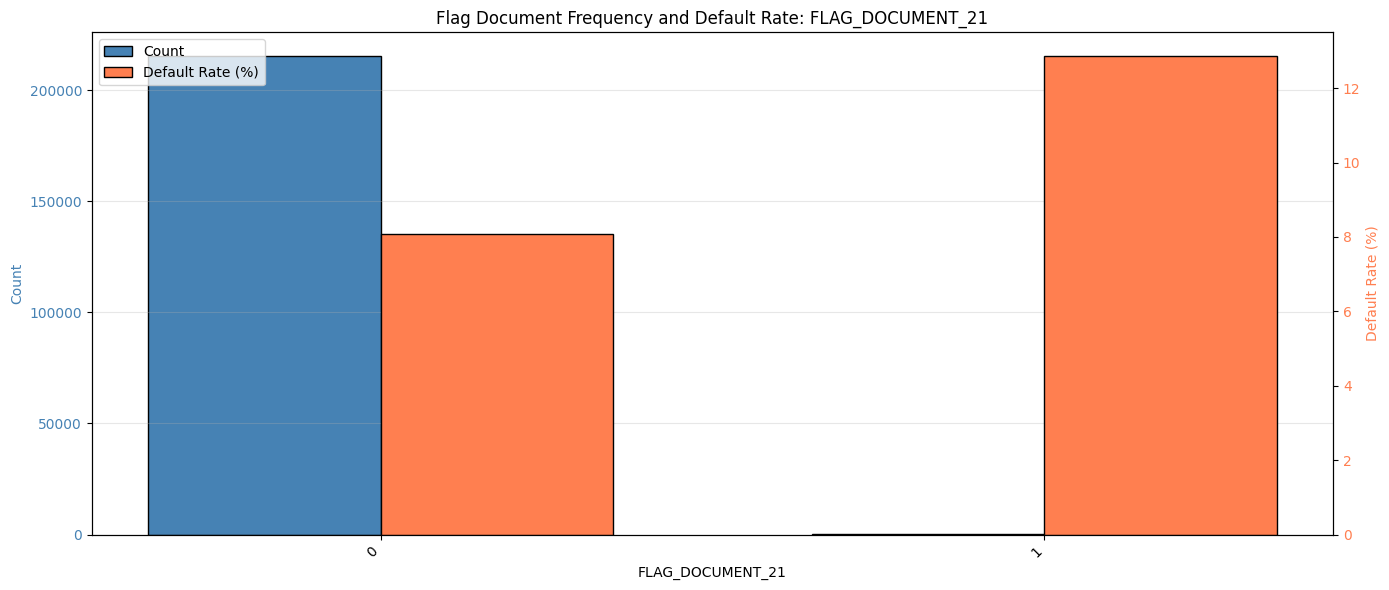

In [65]:
for col in document_cols:
    plot_grouped_bar_vs_target(
        data=df,
        feature=col,
        target=target_col,
        title=f'Flag Document Frequency and Default Rate: {col}',
    )

In [66]:
relationship_results_list = []

for col in document_cols:
    if col in df.columns and target_col in df.columns:

        metrics_df = calculate_target_relationship_nominal(
            data=df,
            feature=col,
            target=target_col
        )
        relationship_results_list.append(metrics_df)
    else:
        print(f"Warning: Column '{col}' or '{target_col}' not found in DataFrame.")

document_relationship_summary = pd.concat(relationship_results_list, ignore_index=True)

document_relationship_summary

,Feature,Unique_Values,Chi2_Statistic,Chi2_P_Value,Cramers_V,Information_Value,Mutual_Information
0,FLAG_DOCUMENT_2,2,5.790734,1.611086e-02,0.005187,1.146223e-04,1.244296e-05
1,FLAG_DOCUMENT_3,2,420.199260,2.208386e-93,0.044182,2.837760e-02,1.025095e-03
2,FLAG_DOCUMENT_4,2,0.758141,3.839109e-01,0.001877,6.463257e-05,7.430282e-06
3,FLAG_DOCUMENT_5,2,0.307305,5.793387e-01,0.001195,2.174333e-05,8.078821e-07
4,FLAG_DOCUMENT_6,2,183.991060,6.517205e-42,0.029236,1.346366e-02,4.731078e-04
5,FLAG_DOCUMENT_7,2,0.100697,7.509945e-01,0.000684,1.597596e-05,8.398623e-07
6,FLAG_DOCUMENT_8,2,12.914022,3.261297e-04,0.007746,8.457252e-04,3.101365e-05
7,FLAG_DOCUMENT_9,2,2.877855,8.980557e-02,0.003656,2.090920e-04,7.701032e-06
8,FLAG_DOCUMENT_10,2,0.000000,1.000000e+00,0.000000,8.031046e-06,2.346331e-06
9,FLAG_DOCUMENT_11,2,4.136380,4.197082e-02,0.004384,3.028510e-04,1.106978e-05


Most variables show very weak relationships with the target across all metrics. Although several features have statistically significant Chi-square p-values like `FLAG_DOCUMENT_3`, `FLAG_DOCUMENT_6`, `FLAG_DOCUMENT_13–16`, their effect sizes remain extremely small: Cramer's V values are all below `0.05`, and both Information Value and Mutual Information are close to zero. This indicates that, despite statistical significance due to large sample size, these document flags provide minimal predictive power and are unlikely to meaningfully improve the model.

### **Credit Bureau Enquiry Variables**

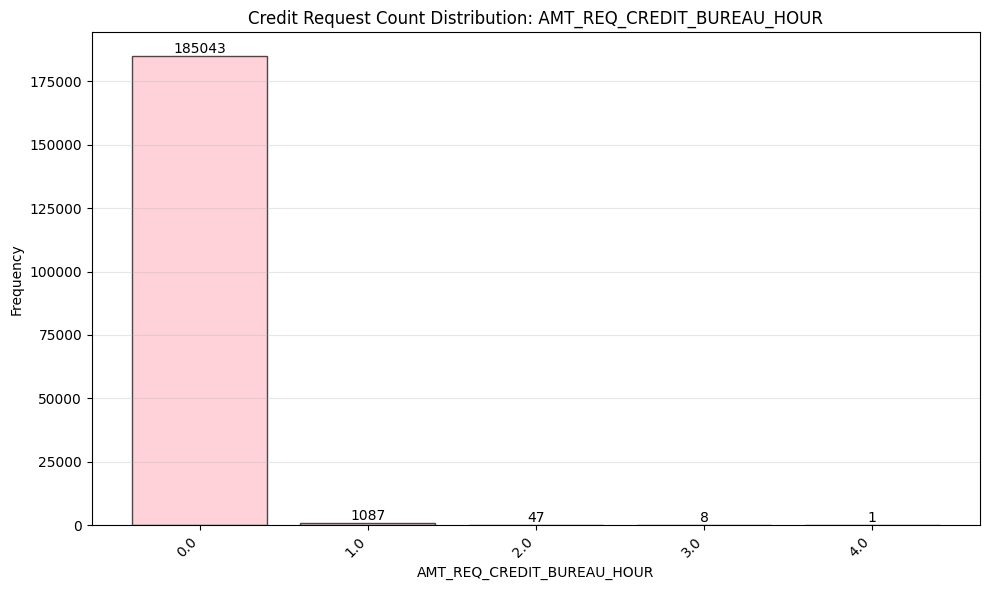

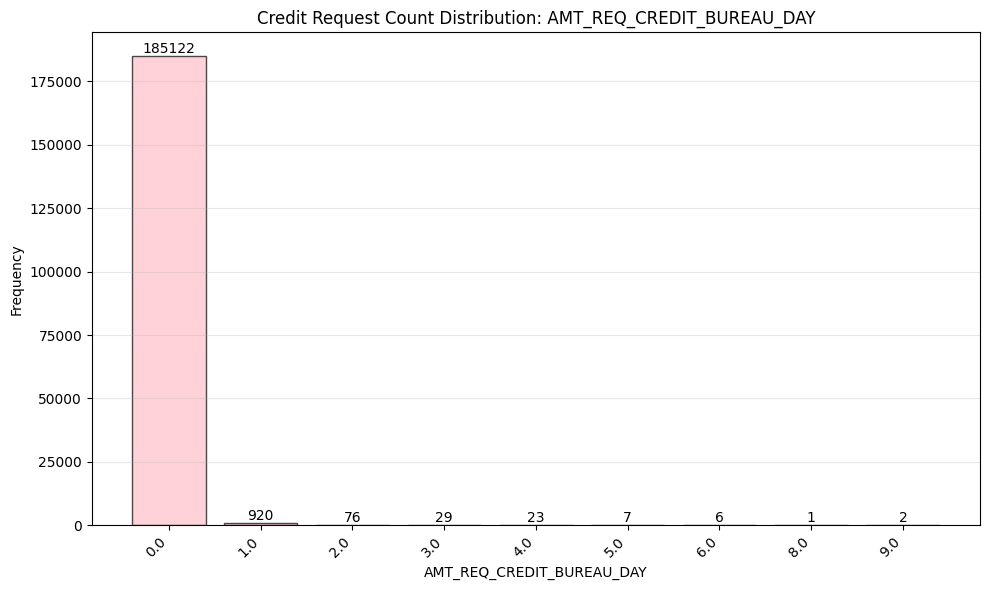

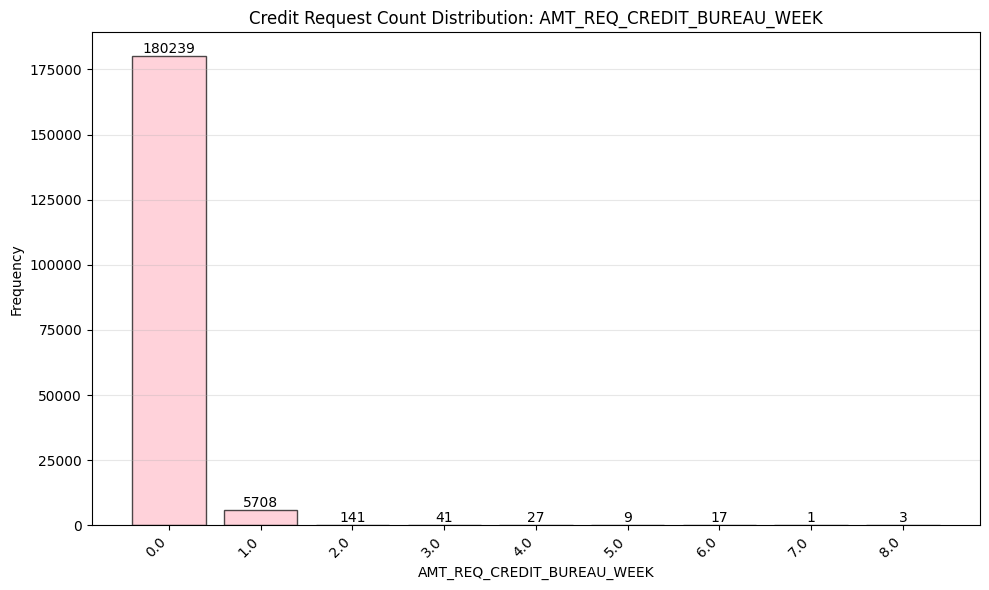

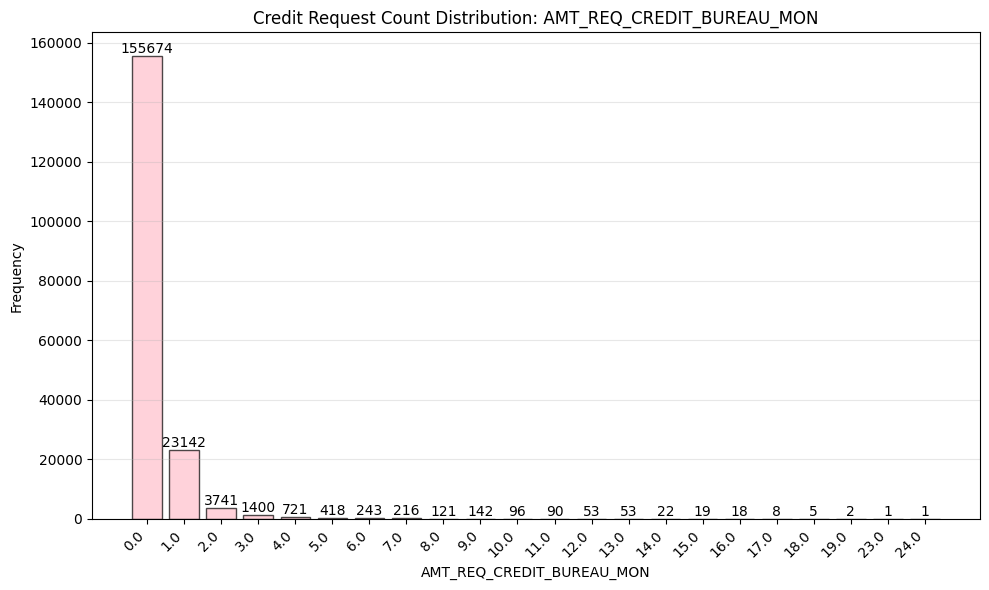

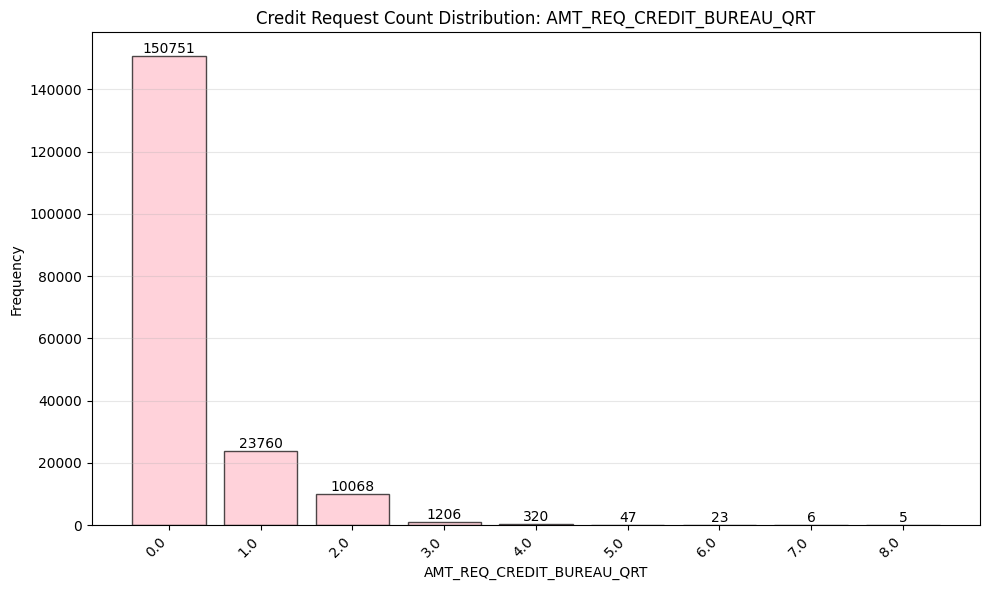

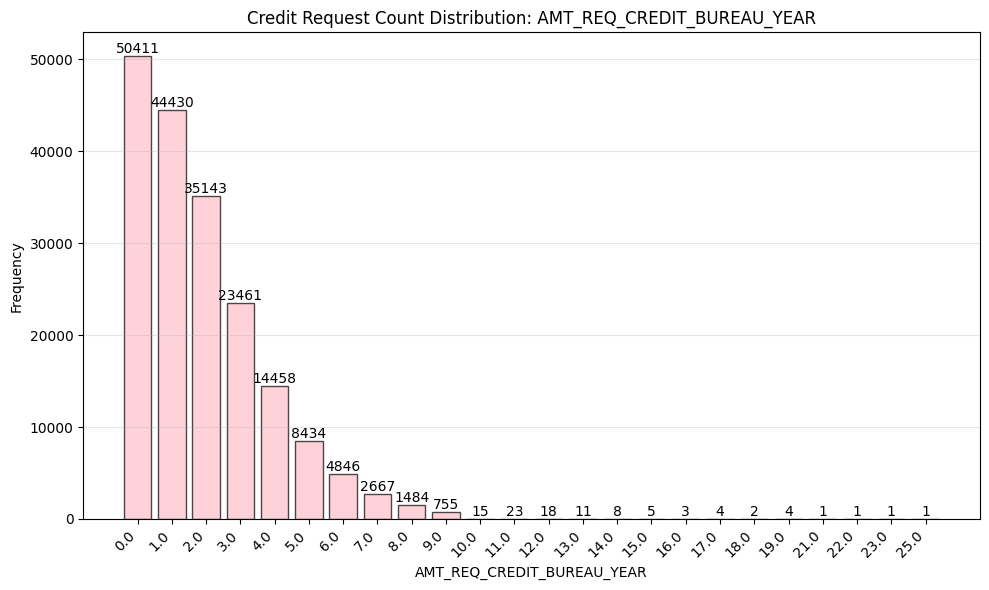

In [67]:
for col in credit_bureau_cols:
    column_data = df[col]
    
    plot_discrete_barchart(
        data=column_data,
        title=f'Credit Request Count Distribution: {col}',
        color='pink' 
    )

In [68]:
results_list = []
for col in credit_bureau_cols:
    column_data = df[col]
    
    metrics_df = calculate_nominal_metrics(data=column_data)
    results_list.append(metrics_df)

credit_bureau_metrics_summary = pd.concat(results_list, ignore_index=True)

credit_bureau_metrics_summary

,Feature,Count,Missing,Unique_Values,Mode,Mode_Frequency,Mode_Percentage
0,AMT_REQ_CREDIT_BUREAU_HOUR,186186,29072,5,0.0,185043,99.386098
1,AMT_REQ_CREDIT_BUREAU_DAY,186186,29072,9,0.0,185122,99.428528
2,AMT_REQ_CREDIT_BUREAU_WEEK,186186,29072,9,0.0,180239,96.805882
3,AMT_REQ_CREDIT_BUREAU_MON,186186,29072,22,0.0,155674,83.612087
4,AMT_REQ_CREDIT_BUREAU_QRT,186186,29072,9,0.0,150751,80.967957
5,AMT_REQ_CREDIT_BUREAU_YEAR,186186,29072,24,0.0,50411,27.075613


**Analysis of the distribution of Credit Bureau Enquiry group**

All six variables are highly right-skewed and dominated by zero values, indicating that most applicants had no recent credit bureau inquiries in the corresponding time window.

**Business Interpretation**  
The group of credit enquiries variables reflects the level and frequency of times a customer's credit information has been queried by institutions like CIC, PCB, FICO, etc. This is the first step in the loan application process. Therefore, their distributions carry significant information about the borrowing behavior of the customer.

***1. HOUR & DAY Enquiries***  
`(AMT_REQ_CREDIT_BUREAU_HOUR`, `AMT_REQ_CREDIT_BUREAU_DAY)`
- **Observation**: >99% of values are equal to 0.
- In reality, very few customers have separate enquiries within the hour or within the next day excluding the hour before.
- **Typical Process Flow**:
  1. Customer submits application
  2. Bank checks Credit Bureau
  3. Underwriting (takes a few days)
  4. Disbursement  
  → Customers have no motivation to apply again within these periods.
- **Business Implication**  
  Values > 0 are **extremely rare** → abnormal events.
  + These customers typically:
    - Are  Are in urgent need of cash ("hot money")
    - Were repeatedly rejected and are applying everywhere at once
    - Facing a financial crisis and desperately seeking loans  
  **→ High-risk customers**

***2. WEEK Enquiry*** `(AMT_REQ_CREDIT_BUREAU_WEEK)`
- **Observation**: ~3% of values > 0 → Rare, but reasonable.
- **Why still low?**  
  Within 8 days, most customers are either:
  + Waiting for approval, or
  + Borrowing from only one source
- **Business Implication**  
  Customers with values > 0 usually:
  + Are comparing interest rates among banks ("loan shopping")
  + Were rejected elsewhere and are re-applying  
  **→ Slightly increased risk** (shopping behavior)

***3. MONTH Enquiry*** `(AMT_REQ_CREDIT_BUREAU_MON)`
- **Observation**: ~16% of values > 0 → Becoming common.
- **Why does the >0 proportion increase sharply?**  
  Personal credit products often have CIC check cycles of a few weeks to a few months. Customers can apply for multiple products within 1–2 months (e.g., credit card → consumer loan).
- **Business Implication**  
  Typical behaviors:
  + Opening new credit cards
  + Taking consumer/installment loans
  + Refinancing debt
  + Buying car/goods on installment  
  **→ Medium risk**, normal credit behavior

***4. QUARTER Enquiry*** `(AMT_REQ_CREDIT_BUREAU_QRT)`
- **Observation**: ~19% of values > 0 → Accumulation of normal behavior.
- **Quarter vs Month**  
  QUARTER covers 3 months → count is naturally higher than MONTH. It does **not** reflect new behavior, just accumulation.
- **Business Implication**  
  Similar to MONTH, but more stable. Good indicator of **short-term credit activity**.

***5. YEAR Enquiry*** `(AMT_REQ_CREDIT_BUREAU_YEAR)` → **The Most Important Variable**
- **Actual Distribution**
  + **73%** had at least one enquiry in months 4–12 before application → **Active**
  + **27%** had **zero** enquiries in months 4–12 before application → **Dormant**
- **Implication of the Two Groups**
  - **(A) YEAR > 0 → Active Customers**
    + Normal borrowing activity (home/auto loans, consumer loans, credit cards)
    + **Medium risk**
  - **(B) YEAR = 0 → Credit-Dormant Customers** (most interesting group)  
    Possible reasons:
    1. **New-to-credit**: Young customers, first-time borrowers
    2. **Financially sound**: Stable income, no borrowing need in the past year
    3. **Poor history → gave up**: Previously rejected multiple times, stopped applying  
    → Risk is **hard to assess** with this variable alone → must combine with demographics/income variables.

***6. YEAR > 5 Enquiries*** → **Strong Warning Flag**
- This is a very small group but **extremely important**.
- **Practical Implication**  
  Customers applying >5 times in 12 months are usually:
  + Financially stressed, rolling over revolving debt
  + Applying simultaneously to many lenders
  + Highly distressed borrowers
  + Possibly involved in shadow banking or irregular repayments  
  **→ Clear high-risk behavioral pattern**

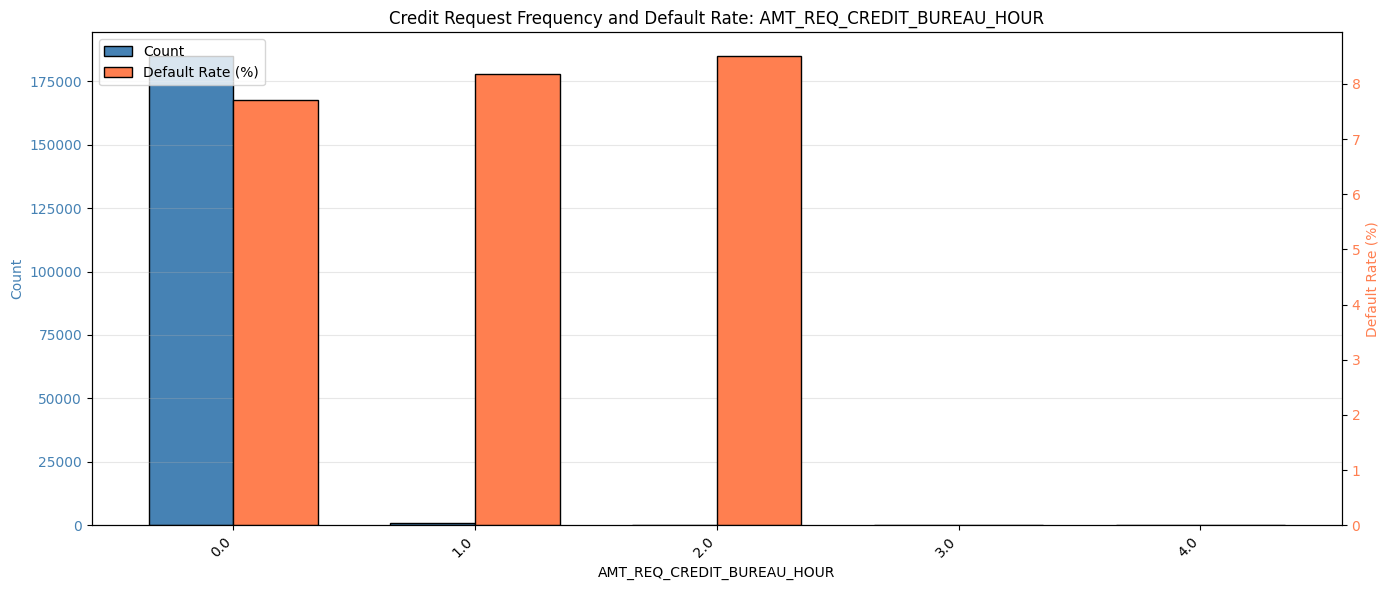

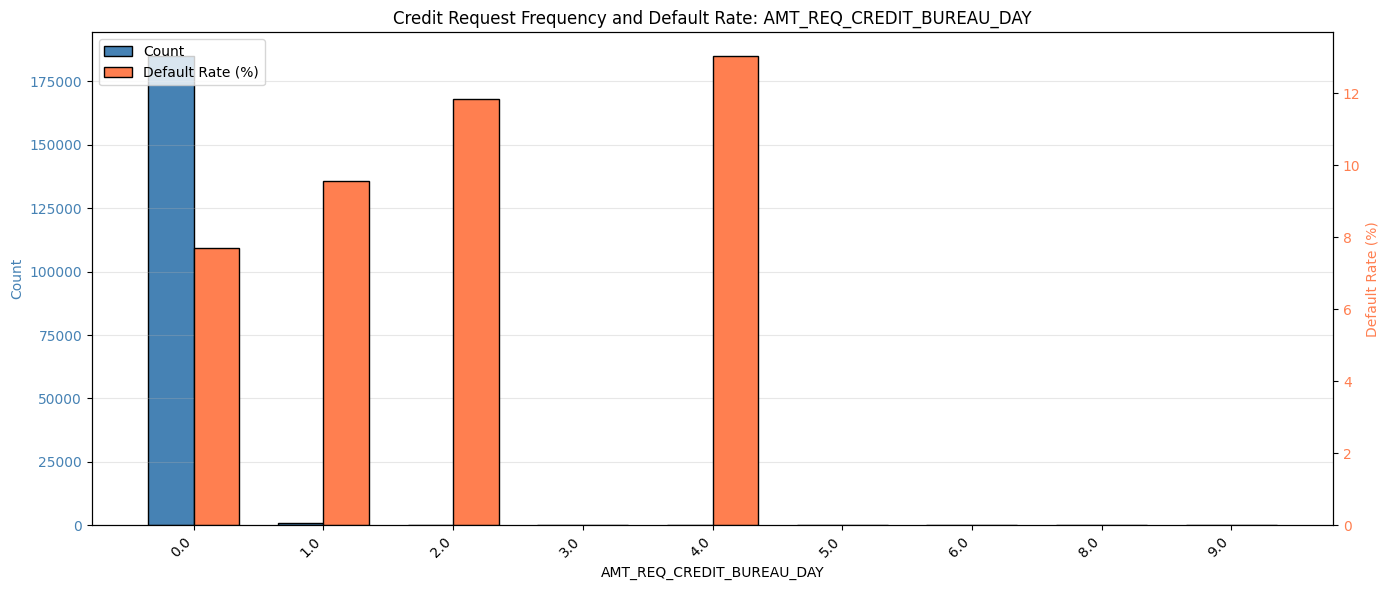

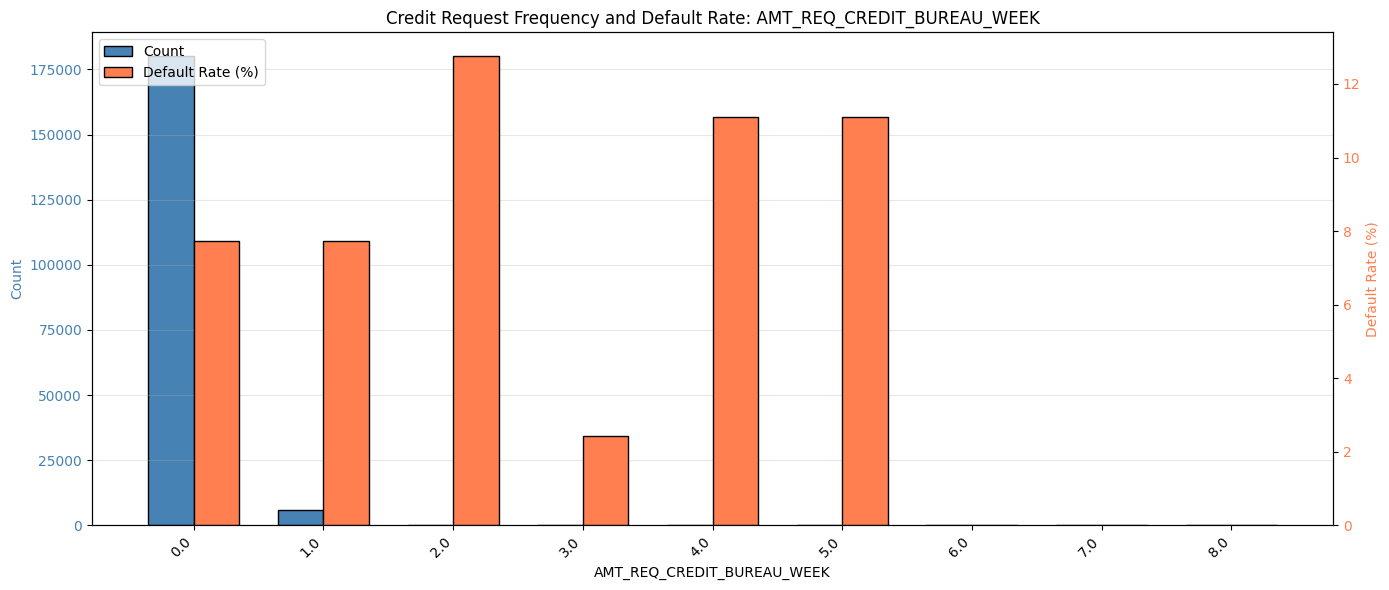

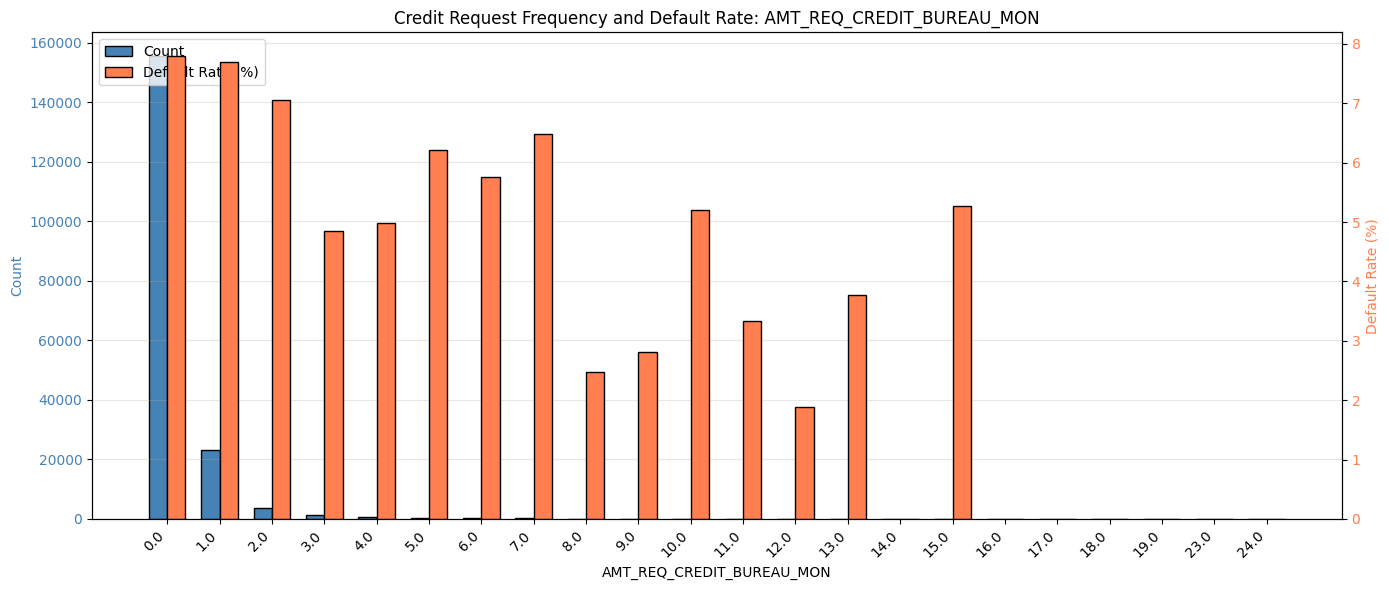

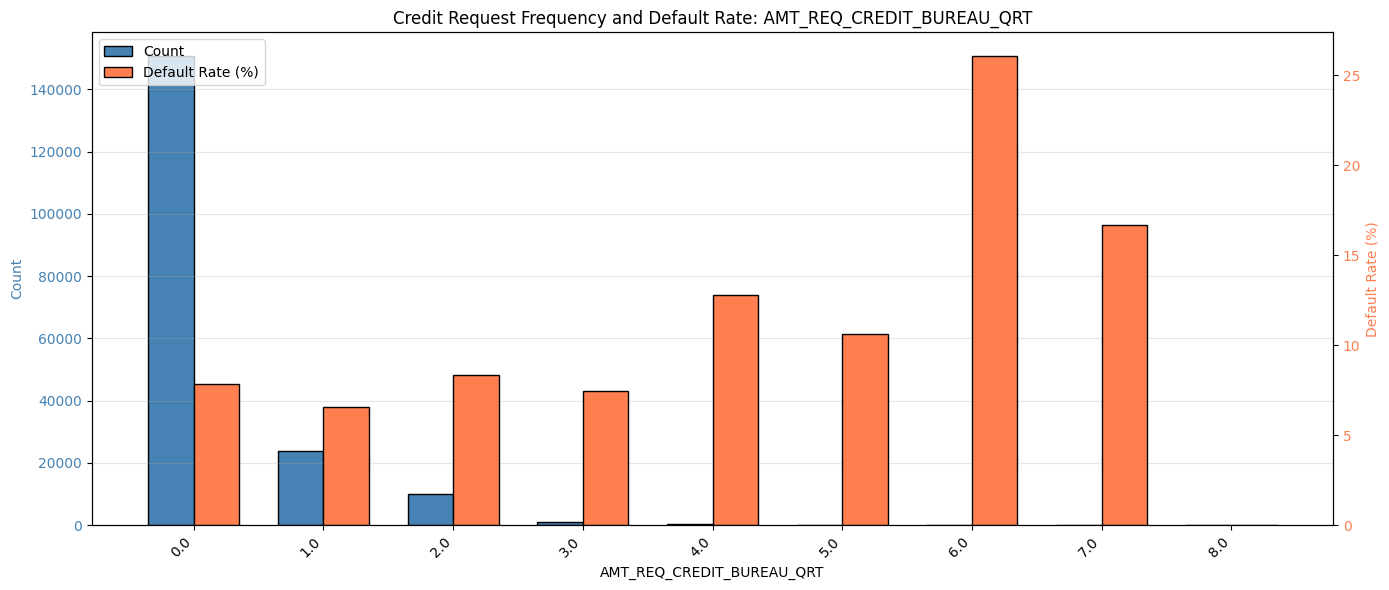

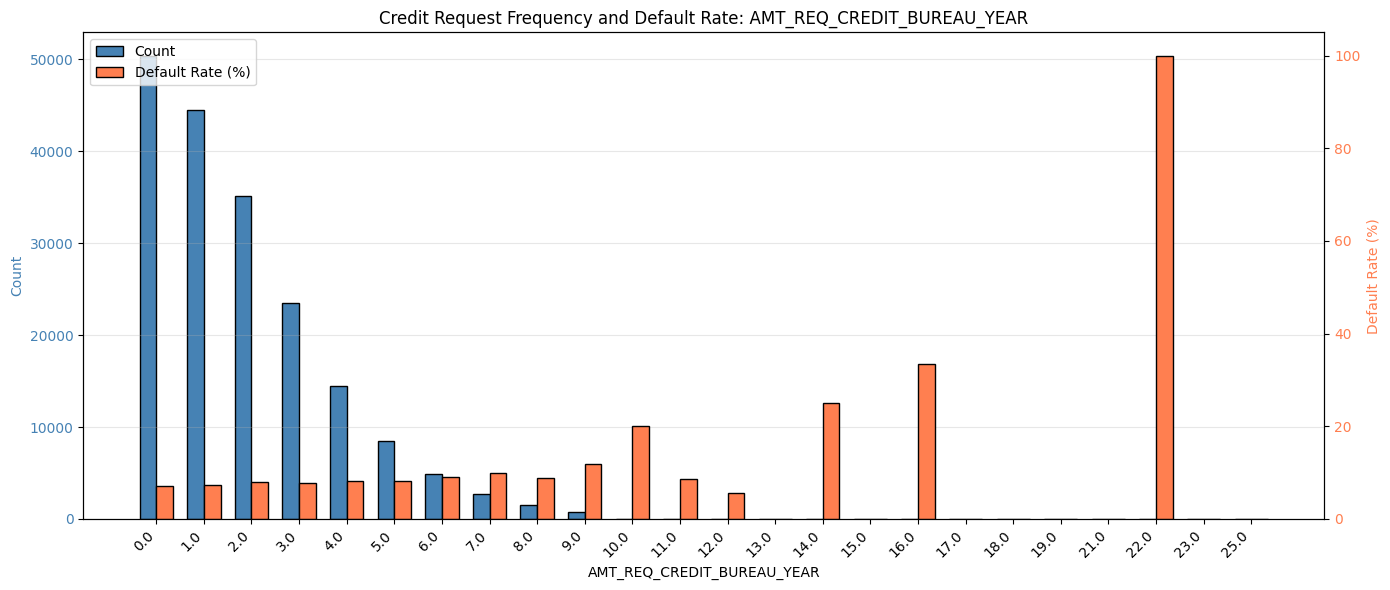

In [69]:
for col in credit_bureau_cols:
    plot_grouped_bar_vs_target(
        data=df,
        feature=col,
        target=target_col,
        title=f'Credit Request Frequency and Default Rate: {col}',
    )

The relationship between credit bureau request frequency and the Default Rate shows these key findings:

- Zero Requests (`0.0`): This is the most frequent category across all timeframes. Default rates for this group are generally low to moderate (<10%).

- High Predictive Power in Quarterly/Yearly Data:
    + Quarterly Requests (QRT): Shows the clearest risk pattern. The default rate peaks significantly at `6.0` requests (over `25%`) and is also high at `4.0` and `7.0` requests, suggesting concentrated risk at specific quarterly inquiry counts.

    + Yearly Requests (YEAR): While counts are very low, the default rate shows extremely high spikes for `17.0` and `22.0` requests (up to `100%`), indicating that a high number of annual inquiries is a severe risk indicator, though with limited sample size.

    + Daily/Hourly Data: The vast majority of applicants have `0.0` requests, making the predictive power of `1.0` or more requests limited due to extremely small sample counts.

The number of inquiries per Quarter and Year are the most powerful among these variables for separating high-risk applicants, as they show the most dramatic increases in the Default Rate.

In [70]:
# 3. Initialize an empty list to store the results
relationship_results_list = []

# 4. Loop through the Credit Bureau columns and calculate target relationship metrics
for col in credit_bureau_cols:
    # Ensure the feature and target columns exist in the DataFrame
    if col in df.columns and target_col in df.columns:
        
        # Calculate relationship metrics
        metrics_df = calculate_target_relationship_discrete_many_nunique(
            data=df,
            feature=col,
            target=target_col
        )
        relationship_results_list.append(metrics_df)
    else:
        print(f"Warning: Column '{col}' or '{target_col}' not found in DataFrame.")

# 5. Concatenate all individual DataFrames into a single summary DataFrame
credit_bureau_discrete_summary = pd.concat(relationship_results_list, ignore_index=True)

# 6. Display the final summary table
credit_bureau_discrete_summary

,Feature,Unique_Values,Point_Biserial_Correlation,Point_Biserial_P_Value,Information_Value
0,AMT_REQ_CREDIT_BUREAU_HOUR,5,0.000865,7.088493e-01,0.000045
1,AMT_REQ_CREDIT_BUREAU_DAY,9,0.002506,2.796260e-01,0.000615
2,AMT_REQ_CREDIT_BUREAU_WEEK,9,0.000294,8.990181e-01,0.000473
3,AMT_REQ_CREDIT_BUREAU_MON,22,-0.014483,4.116586e-10,0.004343
4,AMT_REQ_CREDIT_BUREAU_QRT,9,-0.001773,4.441920e-01,0.005101
5,AMT_REQ_CREDIT_BUREAU_YEAR,24,0.019471,4.380032e-17,0.006363


Across all six variables, the relationship with the target is consistently very weak. The point-biserial correlations are extremely small, ranging from approximately `–0.014` to `0.019`, indicating virtually no linear association between the frequency of credit bureau inquiries and the probability of default.

Only two features `AMT_REQ_CREDIT_BUREAU_MON` and `AMT_REQ_CREDIT_BUREAU_YEAR` show statistically significant p-values, but this significance is driven by the large dataset size rather than meaningful effect size. The corresponding correlations remain close to zero, showing that the practical impact is negligible.

Information Value scores are all below `0.01`, reinforcing that each variable provides very little discriminatory power between good and bad clients. In summary, although the features differ in the number of unique categories, they contribute little to model performance, and they may be safely deprioritized in feature selection.

# **STEP 2: Data Cleaning**

## **Handling Missing Values**

In [71]:
# Missing count and percentage
missing_summary = pd.DataFrame({
    'missing_count': df[cols_to_check].isnull().sum(),
    'missing_percent': df[cols_to_check].isnull().mean() * 100
})

missing_summary

,missing_count,missing_percent
FLAG_DOCUMENT_2,0,0.000000
FLAG_DOCUMENT_3,0,0.000000
FLAG_DOCUMENT_4,0,0.000000
FLAG_DOCUMENT_5,0,0.000000
FLAG_DOCUMENT_6,0,0.000000
FLAG_DOCUMENT_7,0,0.000000
FLAG_DOCUMENT_8,0,0.000000
FLAG_DOCUMENT_9,0,0.000000
FLAG_DOCUMENT_10,0,0.000000
FLAG_DOCUMENT_11,0,0.000000


From this output, we observe that 6 columns in the `req_credit_cols` group have the identical number of missing values, suggesting that their missing values might appear on the same rows. Therefore, we decided to check this assumption.

In [72]:
# 1. Filter rows with missing values for each column in DataFrame df
missing_hour = df[df[credit_bureau_cols[0]].isnull()]
missing_day = df[df[credit_bureau_cols[1]].isnull()]
missing_week = df[df[credit_bureau_cols[2]].isnull()]
missing_mon = df[df[credit_bureau_cols[3]].isnull()]
missing_qrt = df[df[credit_bureau_cols[4]].isnull()]
missing_year = df[df[credit_bureau_cols[5]].isnull()]

# 2. Get the indices of the missing rows
idx_hour = set(missing_hour.index)
idx_day = set(missing_day.index)
idx_week = set(missing_week.index)
idx_mon = set(missing_mon.index)
idx_qrt = set(missing_qrt.index)
idx_year = set(missing_year.index)

# 3. Intersect the indices to find the commonly missing rows
common_idx = idx_hour & idx_day & idx_week & idx_mon & idx_qrt & idx_year

# 4. Check if all sets of missing indices are identical
all_same = (idx_hour == idx_day == idx_week == idx_mon == idx_qrt == idx_year)

# Print the check result
print(f"Do the missing values across the six Credit Bureau Enquiry variables occur in the SAME set of rows?", all_same)

# Print the total count of identical missing rows
print("Total count of identical missing rows (missing values) across the 6 columns:", len(common_idx))

Do the missing values across the six Credit Bureau Enquiry variables occur in the SAME set of rows? True
Total count of identical missing rows (missing values) across the 6 columns: 29072


**Analysis of Missing Values in Credit Bureau Enquiry Variables**

Upon inspecting the six Credit Bureau Enquiry variables, we find the following characteristics:
- Shared missing rows: Exactly `29,072` rows have missing values across all six columns.
- Missing pattern: The missing values occur in the same set of rows for all six variables.
- Not equivalent to zero: There are zero values in six columns, meaning `missing ≠ no enquiries recorded`.

***Interpretation:***
These missing entries originate from the Credit Bureau itself. In other words, for these borrowers, the Bureau did not provide any data. This typically happens when:
1. The applicant has no credit history at the Bureau – for example, they have never borrowed from a formal financial institution.
2. The Bureau does not maintain a record for the individual (perhaps due to limited national coverage or system connectivity).
3. Administrative or data collection issues – occasional data entry errors or delays in reporting.
This phenomenon is often referred to as “No Hit” in the Bureau, indicating that there were no enquiries to report for these applicants.

***Conclusion on missing type:***
These missing values are not missing completely at random (MCAR). Instead, they could carry meaningful business information: the absence of a credit history.

**Approach to Handle Missing Values in Credit Bureau Enquiries**
- Step 1: Create a missing indicator (flag)

This flag captures whether Bureau data is missing for each applicant, allowing the model to learn patterns associated with applicants who have no credit history, which can be predictive of default risk.

- Step 2: Fill all NA values with 0

Since missing means “no enquiries recorded”, it is reasonable to treat NA as 0 enquiries. This preserves the numeric nature of the features for modeling (Logistic Regression, tree-based models). Combined with the flag, the model can differentiate between actual 0 enquiries and missing due to no Bureau coverage, capturing the informative missing pattern.

In [73]:
df_prep = df.copy()

In [74]:
def impute_credit_bureau_missing(df: pd.DataFrame, credit_bureau_cols: List[str]) -> pd.DataFrame:
    """
    Imputes missing values for Credit Bureau request columns and creates a missingness flag.
    """
    df_out = df.copy()

    # 1. Feature 1: Binary flag for missingness
    df_out['HAS_CREDIT_BUREAU_DATA'] = (~df_out[credit_bureau_cols[0]].isna()).astype(int)
            
    # 2. Feature 2: Fill 0 for all bureau counts
    # It's assumed that if the request count is missing, it means the count was 0.
    df_out[credit_bureau_cols] = df_out[credit_bureau_cols].fillna(0)
    
    return df_out

In [75]:
df_prep = impute_credit_bureau_missing(df_prep, credit_bureau_cols)

## **Handling Outliers**

## **Handling Inconsistencies**

# **STEP 3: Data transformation**

## **Feature scaling**

## **Feature encoding**

The following function `encode_bureau_categorical` transforms numeric credit bureau enquiry variables into categorical bins based on distribution and business meaning. This is expected to improve interpretability and model performance.

**Overall Benefits**
- Handles sparse distributions and extreme values.
- Encodes business-relevant risk patterns.
- Reduces noise for modeling and improves predictive stability.
- Easier interpretation for analysts and risk managers.

In [76]:
def encode_bureau_categorical(df, credit_bureau_cols):
    """
    Encode Credit Bureau Enquiry to capture zero vs non-zero
    """
    
    for col in credit_bureau_cols:
        new_col = col + '_CAT'
        
        # Define bins dựa trên distribution
        if col in ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY']:
            # HOUR/DAY: 0 vs >0
            df[new_col] = (df[col] > 0).astype(int)
            df[new_col] = df[new_col].map({0: 'ZERO', 1: 'HAS_ENQUIRY'})
            
        elif col in ['AMT_REQ_CREDIT_BUREAU_WEEK']:
            # WEEK: 0, 1, >1
            df[new_col] = 'ZERO'
            df.loc[df[col] == 1, new_col] = 'ONE'
            df.loc[df[col] > 1, new_col] = 'MULTIPLE'
            
        elif col in ['AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']:
            # MONTH/QRT: 0, 1-2, >2
            df[new_col] = 'ZERO'
            df.loc[df[col].between(1, 2), new_col] = 'LOW'
            df.loc[df[col] > 2, new_col] = 'HIGH'
            
        else:  # YEAR
            # YEAR: 0, 1-2, 3-5, >5
            df[new_col] = 'ZERO'
            df.loc[df[col].between(1, 2), new_col] = 'LOW'
            df.loc[df[col].between(3, 5), new_col] = 'MEDIUM'
            df.loc[df[col] > 5, new_col] = 'HIGH'

        # df = df.drop(col, axis=1)
    
    return df

In [77]:
df_prep = encode_bureau_categorical(df_prep, credit_bureau_cols)

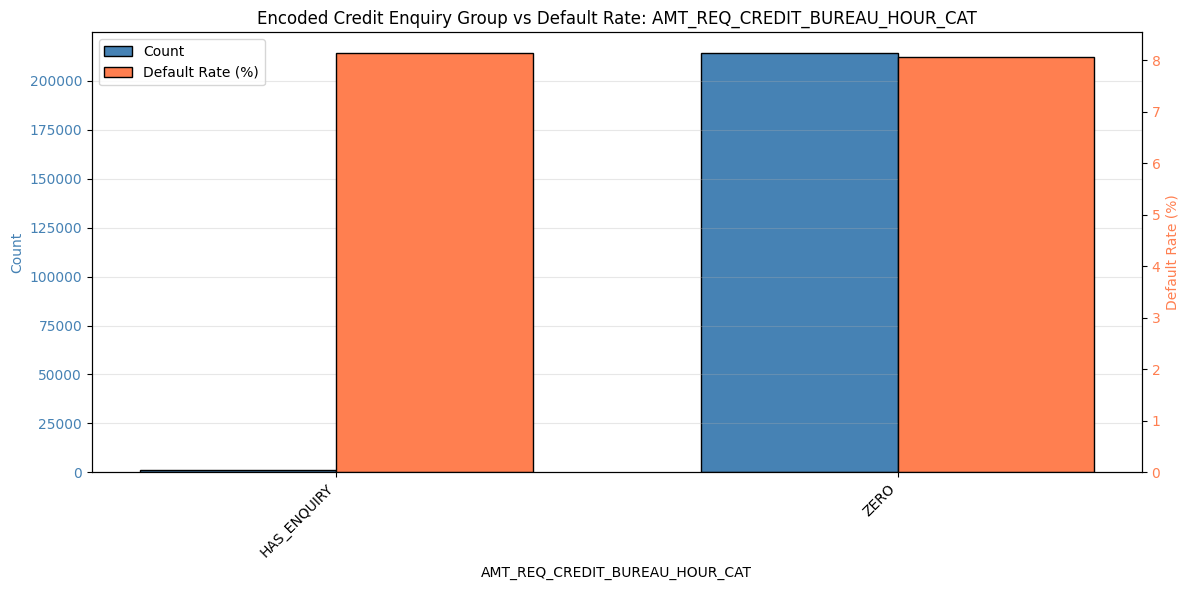

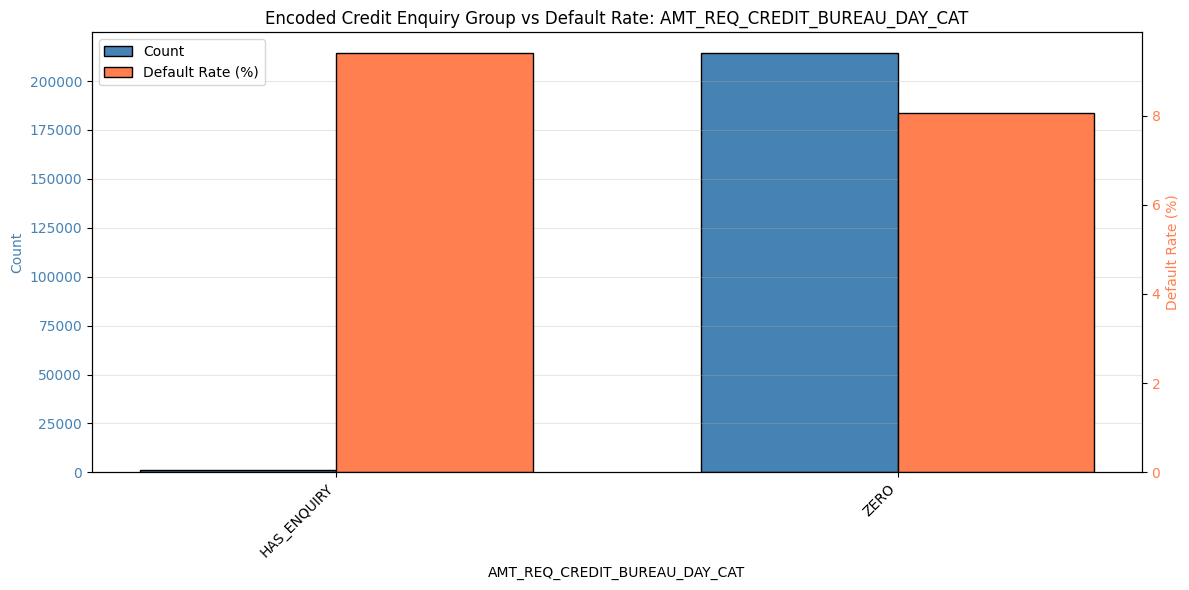

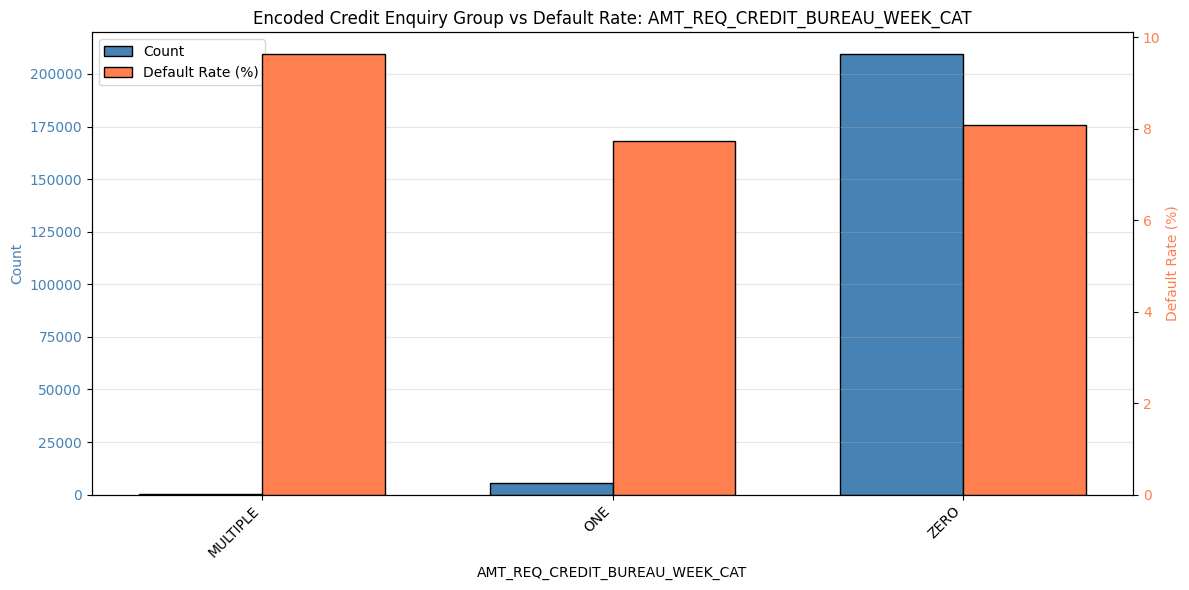

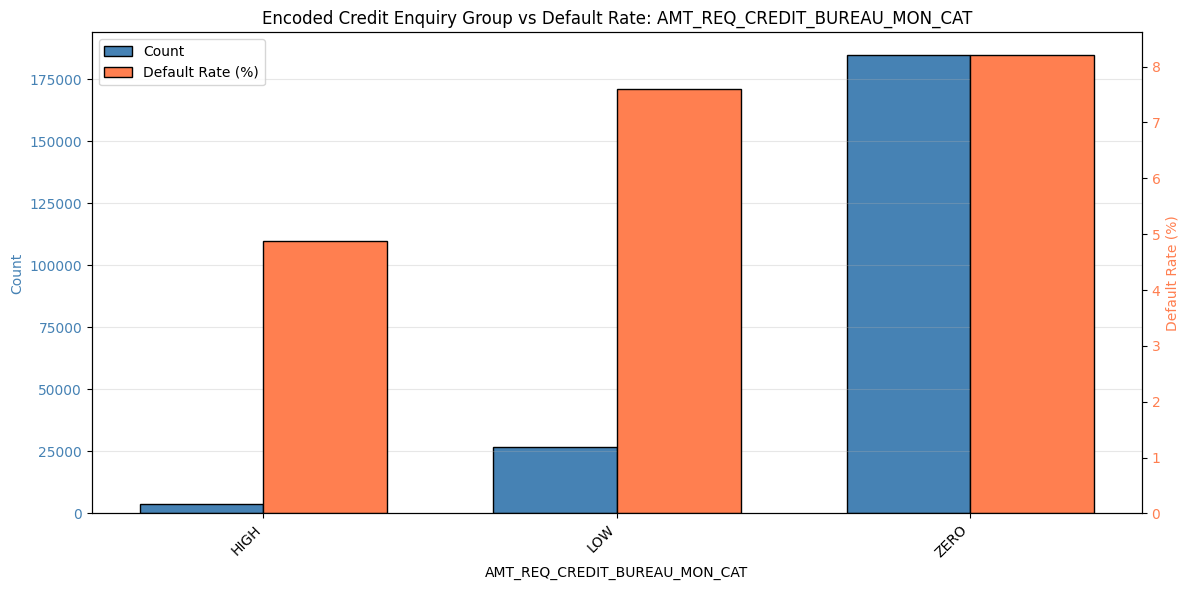

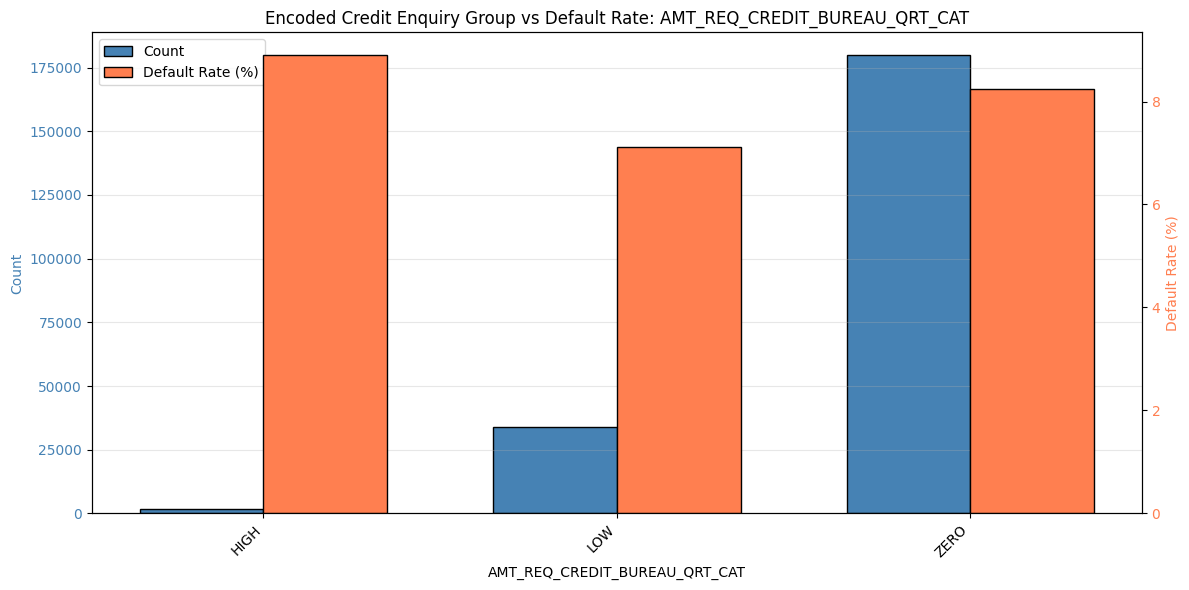

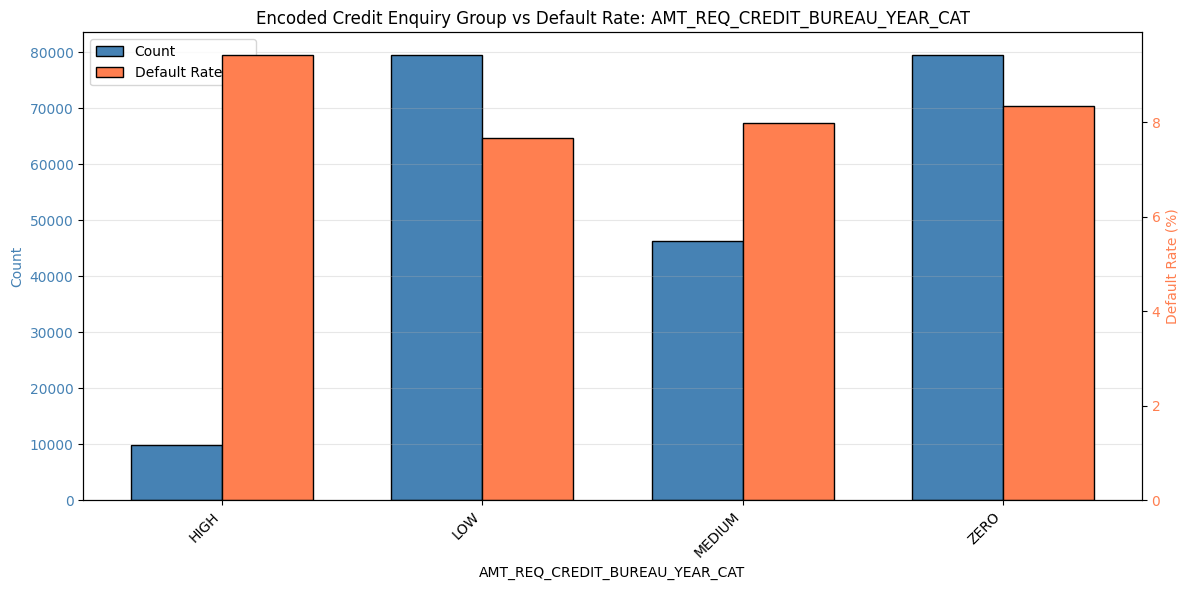

In [78]:
credit_bureau_cols_encoded = [col + '_CAT' for col in credit_bureau_cols]

for col in credit_bureau_cols_encoded:
    # Ensure the new feature and target columns exist in the DataFrame
    if col in df_prep.columns and target_col in df_prep.columns:
        
        # Call the function to plot the grouped bar chart
        plot_grouped_bar_vs_target(
            data=df_prep,
            feature=col,
            target=target_col,
            title=f'Encoded Credit Enquiry Group vs Default Rate: {col}',
            figsize=(12, 6)
        )
    else:
        print(f"Warning: Encoded Column '{col}' or '{TARGET_COLUMN}' not found in DataFrame.")

In [79]:
from sklearn.model_selection import train_test_split
print("Splitting Data into Train and Test")
X = df_prep.drop('TARGET', axis=1)
y = df_prep['TARGET']

# Split 80% Train, 20% Test (Important: Use stratify=y to maintain target distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")

Splitting Data into Train and Test
Train samples: 172206, Test samples: 43052


In [80]:
from sklearn.preprocessing import OrdinalEncoder

class CreditBureauOrdinalEncoder:
    """
    Handles Ordinal Encoding for Credit Bureau frequency columns.
    It ensures the encoder is fitted once on the training data and then reused 
    on all datasets (Train/Test). The temporary categorical columns (_CAT) are 
    dropped after encoding.
    """
    def __init__(self):
        # Define the global ordering for consistency (Lowest Risk -> Highest Risk)
        self.hour_day_order = ['ZERO', 'HAS_ENQUIRY'] 
        self.week_order = ['ZERO', 'ONE', 'MULTIPLE']
        self.mon_qrt_order = ['ZERO', 'LOW', 'HIGH']
        self.year_order = ['ZERO', 'LOW', 'MEDIUM', 'HIGH']
        
        # Dictionary to store the fitted encoders
        self.encoders = {}
        # List to store names of categorical columns that need to be dropped after transformation
        self.cols_to_drop = []
        
    def get_categories(self, col):
        """Helper to get the correct category order for a column."""
        if 'HOUR' in col or 'DAY' in col:
            return [self.hour_day_order]
        elif 'WEEK' in col:
            return [self.week_order]
        elif 'MON' in col or 'QRT' in col:
            return [self.mon_qrt_order]
        elif 'YEAR' in col:
            return [self.year_order]
        return None

    def fit(self, df):
        """
        Fit the OrdinalEncoder on the Training DataFrame and identify columns to drop.
        """
        cat_cols = [col for col in df.columns if col.endswith('_CAT')]
        self.cols_to_drop = [] 
        
        for col in cat_cols:
            categories = self.get_categories(col)
            if categories:
                # Initialize the encoder for the specific column
                encoder = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)
                
                # Fit the encoder on the training data column
                encoder.fit(df[[col]])
                self.encoders[col] = encoder
                self.cols_to_drop.append(col) # Add the fitted column to the drop list
            else:
                print(f"Warning: Could not find category definition for {col}")
                
        return self

    def transform(self, df):
        """
        Apply the fitted OrdinalEncoder, create _ORD columns, and drop the _CAT columns.
        
        Returns:
            pd.DataFrame: DataFrame with new numerically encoded columns (_ORD)
                          and without the original categorical columns (_CAT).
        """
        df_transformed = df.copy() 
        
        # 1. Transform: Apply the fitted encoders
        for col, encoder in self.encoders.items():
            new_ord_col = col.replace('_CAT', '_ORD')
            # Apply the fitted transformation
            df_transformed[new_ord_col] = encoder.transform(df_transformed[[col]])
            df_transformed[new_ord_col] = df_transformed[new_ord_col].astype(int)
            
        # 2. Drop: Remove the temporary categorical columns
        if self.cols_to_drop:
            df_transformed.drop(columns=self.cols_to_drop, inplace=True)
            
        return df_transformed

In [81]:
# Initialize and Fit the Ordinal Encoder
ordinal_processor = CreditBureauOrdinalEncoder()
# FIT the encoder ONLY on the training data (X_train)
ordinal_processor.fit(X_train) 

print("Applying Transformation")
# Transform both Train and Test data
# The _CAT columns will be transformed to _ORD and then dropped.
X_train_processed = ordinal_processor.transform(X_train)
X_test_processed = ordinal_processor.transform(X_test)

print("Verification ---")
print("Train Data Columns after Processing:")
print(X_train_processed.columns.tolist())
print("\nTest Data Columns after Processing:")
print(X_test_processed.columns.tolist())

print("Verification Check (Head of Processed Data)")
print("Original column (AMT_REQ_CREDIT_BUREAU_QRT) and Encoded column (AMT_REQ_CREDIT_BUREAU_QRT_ORD):")
print(X_train_processed[['AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_QRT_ORD']].head())
print("Check if any _CAT columns remain:")
remaining_cat_cols = [col for col in X_train_processed.columns if col.endswith('_CAT')]
print(f"Remaining _CAT columns: {remaining_cat_cols}. (Expected: [])")

Applying Transformation
Verification ---
Train Data Columns after Processing:
['ID', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIR

## **Feature engineering**

To handle the problem that most of flag documents have very few positive values and make them almost constant and weakly informative, Summing them into a single `TOTAL_DOC_SUBMITTED` variable preserves information about how many documents a customer submitted, while reducing sparsity.

In [84]:
def process_document_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Performs feature engineering on document flags:
    1. Creates a new feature 'TOTAL_DOC_SUBMITTED' by summing the binary FLAG_DOCUMENT_ columns.
    2. Drops the original individual FLAG_DOCUMENT_ columns to reduce dimensionality.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the FLAG_DOCUMENT_ columns.
        
    Returns:
        pd.DataFrame: The DataFrame with the new feature and dropped original columns.
    """
    # 1. Identify all FLAG_DOCUMENT_ columns
    document_cols = [col for col in df.columns if col.startswith('FLAG_DOCUMENT_')]
    
    if not document_cols:
        print("Warning: No FLAG_DOCUMENT_ columns found for processing.")
        return df
    
    df_processed = df.copy()
    
    # 2. Create the new feature: TOTAL_DOC_SUBMITTED
    # Summing binary columns (0/1) gives the total count of documents submitted.
    df_processed['TOTAL_DOC_SUBMITTED'] = df_processed[document_cols].sum(axis=1)
    
    # 3. Drop the original FLAG_DOCUMENT_ columns
    df_processed = df_processed.drop(columns=document_cols)
    
    return df_processed

In [85]:
# Apply the function to the processed training features
X_train_processed = process_document_features(X_train_processed)

# Apply the function to the processed testing features
X_test_processed = process_document_features(X_test_processed)